# Análisis de valores faltantes

In [1]:
import matplotlib.pyplot as plt 
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import upsetplot

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

import modules.utils.paths as path
import modules.utils.get_data as get_data

In [4]:
%run pandas-missing-extension.ipynb

**Carga de datos**

In [5]:
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
datasets_df = get_data.from_r(datasets_names, ".rda")
print(datasets_df.keys())

locals().update(**datasets_df)
del datasets_df

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])


## Tabulación de valores faltantes

In [6]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resumén básico de valores faltantes

- Cuántos valores deberían existir
- Cuántos valores faltan
- Cuántos valores realmente existen
- Cuántas observaciones y variables existen

In [7]:
# Total de elementos del dataframe
print("Total de elementos: ", riskfactors_df.size)

# Total de valores completos
print("Completos: ", riskfactors_df.missing.number_complete())

# Total de valores faltantes
print("Faltantes: ", riskfactors_df.missing.number_missing())

# Observaciones y variables
print(
  f"Observaciones: {riskfactors_df.shape[0]}",
  f"Variables: {riskfactors_df.shape[1]}",
  sep="\n"
)

Total de elementos:  8330
Completos:  7144
Faltantes:  1186
Observaciones: 245
Variables: 34


### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

**Por variable:**
La función personalizada `missing_variable_summary` devuelve `DataFrame` con un resumen por cada viariable en el dataset.

Columnas:
- `variable`: Nombre de la variable (columna del dataset)
- `n_missing`: Número de valores faltantes para la variable.
- `n_cases`: Número total de valores que deberían existir para la variable.
- `pct_missing`: Porcentaje de valores faltantes respecto al total de valores; `n_missing / n_cases`

In [8]:
riskfactors_df.missing.missing_variable_summary().sort_values(by="pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
7,pregnant,215,245,87.755102
26,smoke_stop,212,245,86.530612
27,smoke_last,161,245,65.714286
23,drink_average,135,245,55.102041
22,drink_days,134,245,54.693878
25,smoke_days,128,245,52.244898
17,health_poor,113,245,46.122449
5,bmi,11,245,4.489796
3,weight_lbs,10,245,4.081633
32,diet_vegetable,8,245,3.265306


El resumen anterior podemos observar lo siguiente:

- 7 variables tienen  `> 45%` de datos faltantes.
- Las variables `pregnant` y `smoke_stop` poseen `> 85%` de valores faltantes (¿valdra la pena dejar estas variables en el DataFrame para un posterior análisis?).
- Solo 10 variables cuentaon el $100\%$ de los valores.
- Al resto de las variables con datos faltantes no pasan de un $5\%$.

In [9]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


La tabla obtenida con la función `missing_variable_table` nos dice a cuantas variables tienen la misma cantidad de datos faltantes.

Columnas:
- `n_missing_in_variable`: Cantidad de datos faltantes.
- `n_variables`: Número de variables que poseen `n_missing_in_variable` datos faltantes.
- `pct_variables`: Porcentaje correspondiente al número de variables respecto al total de las mismas en el dataset.

#### Casos / Observaciones / Filas

**Por observaciones:**
La función personalizada `missing_case_summary` devuelve `DataFrame` con un resumen por cada observación/fila en el dataset.

Columnas:
- `case`: Index (número de vilas) de la observación en el `DataFrame` original.
- `n_missing`: Número total de columnas/variables en las cuáles no hay valor (`nan`, `None`, `NA`).
- `pct_missing`: Porcentaje de valores faltantes respecto al total de valores; `n_missing / número de columnas`

In [10]:
missing_case_sumary = riskfactors_df.missing.missing_case_summary().sort_values(by="pct_missing", ascending=False)
missing_case_sumary

,case,n_missing,pct_missing
90,90,15,41.666667
132,132,15,41.666667
3,3,12,33.333333
184,184,12,33.333333
48,48,12,33.333333
...,...,...,...
15,15,2,5.555556
215,215,1,2.777778
185,185,1,2.777778
199,199,1,2.777778


En el resumen anterior se puede resaltar lo siguiente:
- Cada fila arroja el número de total decolumnas que no tienen datos.
- Las filas 90 y 132 son las observaciones con mayores valores faltantes ($41.66\%$).
- A Las 245 tienen almenos un valor faltante.

¿Cuántos casos tienen la misma cantidad de columnas son datos?

In [11]:
(
  missing_case_sumary
  .value_counts("n_missing", sort=True)
  .reset_index(name="count")
)

,n_missing,count
0,4,49
1,5,45
2,7,39
3,6,36
4,2,31
5,3,30
6,1,4
7,8,3
8,12,3
9,15,2


### Intervalos de valores faltantes

Mediante un resumen por bloques, vamos contando cuantos valores hacen faltan en intervalos. Con la función personalizada  `missing_variable_span` logramos hacer el contedo por variable.

Columnas:
- `span_counter`: Número de intervalo.
- `n_missing`: Total de valores valtantes en el intervalo.
- `n_complete`: Total de valores completos en el intervalo. 
- `pct_missing`: Porcentaje que representa `n_missing` en el intervalo. O bien porcentaje de faltnaes.
- `pct_complete`:Porcentaje que representa `n_complete` en el intervalo. O bien porcentaje de completos.

In [12]:
(
  riskfactors_df
  .missing
  .missing_variable_span(variable="weight_lbs", span_every=30)
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,29,3.333333,96.666667
1,1,0,30,0.000000,100.000000
2,2,3,27,10.000000,90.000000
3,3,2,28,6.666667,93.333333
4,4,1,29,3.333333,96.666667
5,5,0,30,0.000000,100.000000
6,6,2,28,6.666667,93.333333
7,7,1,29,3.333333,96.666667
8,8,0,5,0.000000,100.000000


En intervalores de $30$ observaciones para la variable `weight_lbs` podemos observar:
- Son pocos los datos faltantes en la variable.
- Al menos 3 de los intervalos cuentan con el $100\%$ de dados completos.
- El intervalo #3 es el que cuenta con más datos faltantes, solo un $10\%$ 

### _Run length_ de valores faltantes

_Run length_: Rachas de valores faltantes, va va contando los valores completos y cuando encuentra valores faltnates rompe la racha y empieza a contar los faltnates hasta que encuentre valores completos de nuevo (ciclo que se rompe hasta llegar al final de las observaciones). La función personalizada missing_variable_run nos da un dataframe con dicha información.

Columnas:
- `run_length`: Número de observaciones.
- `is_na`: Indica si las observaciones en `run_length` estan completas o son valores faltnates.
  - `complete`: Observaciones con los datos completos.
  - `missing`: Observaciones que no tienen valores.

In [13]:
(
  riskfactors_df
  .missing
  .missing_variable_run(variable="weight_lbs")
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización de valores faltantes

Como cualquier otro tipo de dato, analizar los datos faltantes por medio de tablas es una herramienta muy efectiva, sin embargo puede quedarse corta cuando tenemos demasiadas filas o columnas; es ahí donde utilizar el poder de las visualizaciones entra en juego, pues de manera gráfica (y más rápida) podemos detectar las variables con mayor número de valores faltantes, sus frecuencias e incluso su relación con otras variables.

De la tabla que obtenemos con la fución `missing_variable_summary` podemos visualizar todas las variables del dataframe seguidas de la cantidad total de datos faltantes orodenados de forma desendente, un gráfico tipo `lolipop`:

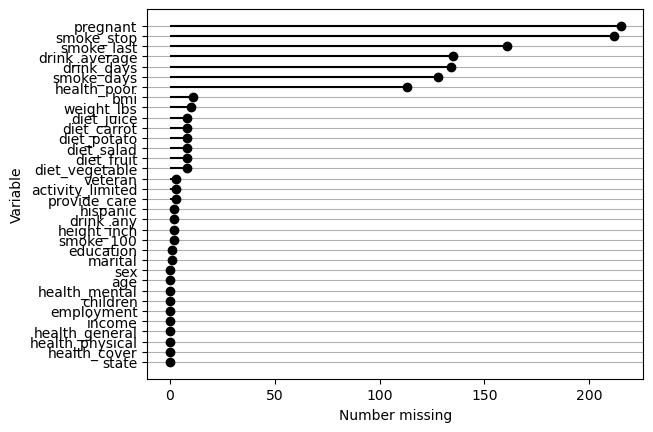

In [14]:
riskfactors_df.missing.missing_variable_plot()

De la tabla que obtenemos con la fución `missing_case_summary` podemos visualizar las filas/casos con un `histograma` que nos muestra el número de variables sin datos (eje x) seguidos del total de filas la misma cantidad de datos faltantes (eje y).

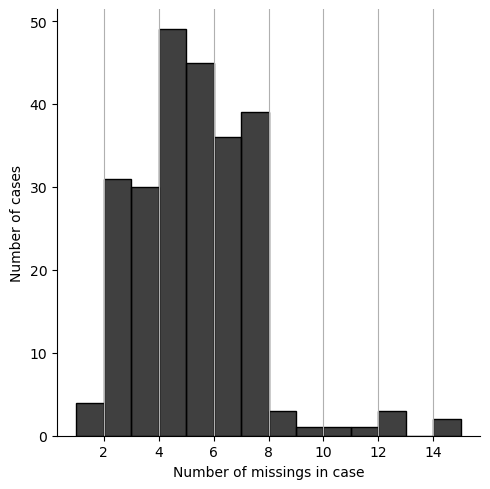

In [15]:
riskfactors_df.missing.missing_case_plot()

En comparación con la tabla `missing_case_summary`, con el histograma facilmente podemos detectar que en la mayoria de los casos (filas) tienen valores faltantes en al menos 5 variables (columas).

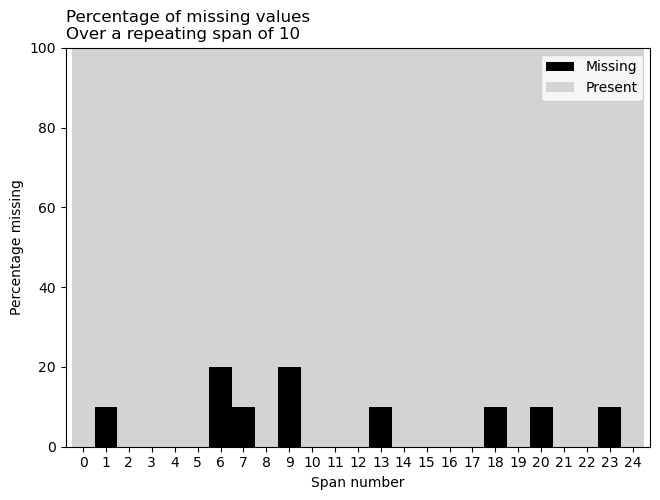

In [16]:
(
  riskfactors_df
  .missing
  .missing_variable_span_plot(variable="weight_lbs", span_every=10)
)

El gráfico muestra la información por bloques de 10 elementos (dado el ejemplo anterior), cada barra de color negro representa el porcentaje de valores faltantes en bloque, mienstrar que en un color claro se representa el porcentaje de los valores completos.

La libreria `missingno` cuenta con una amplia variaedad de gráficos de básicos a avanzados para visualizar los valores faltantes de un DataFrame.

<AxesSubplot:>

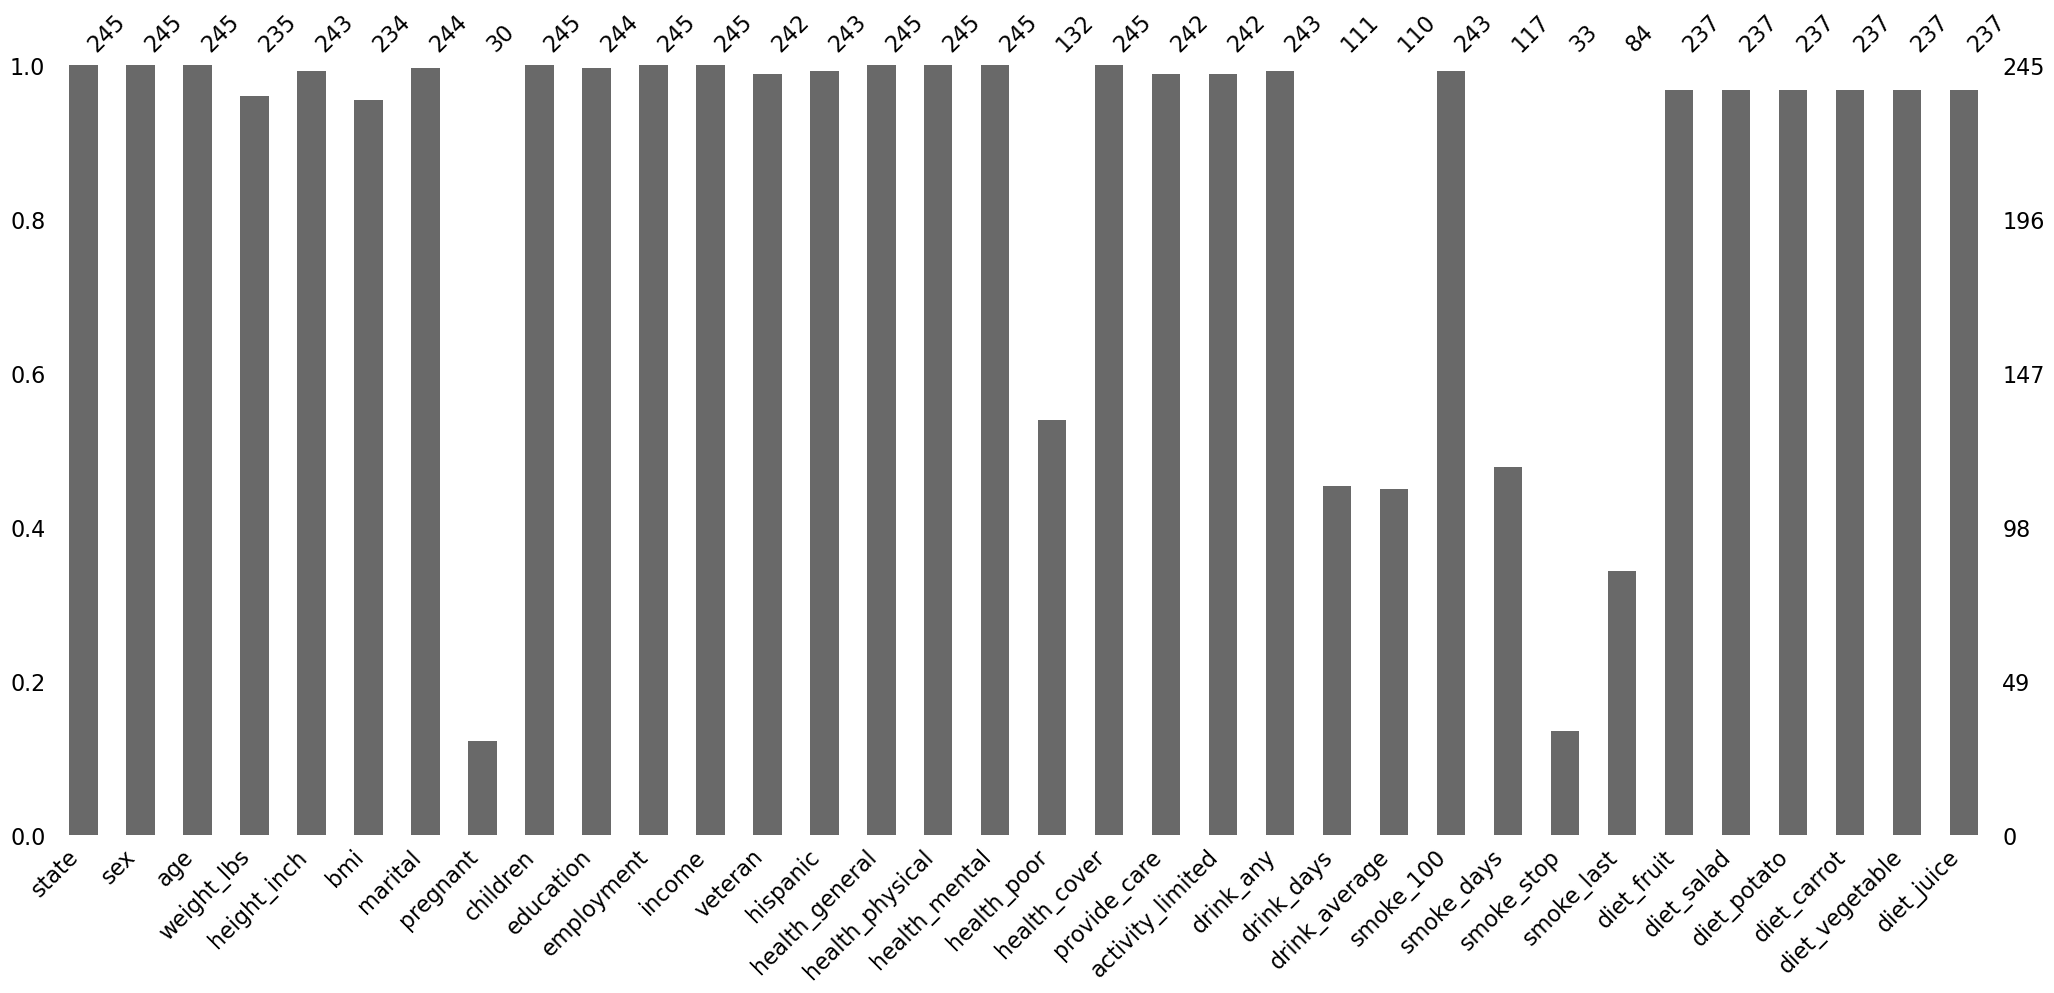

In [17]:
missingno.bar(df=riskfactors_df)

En el gráfico de arriba obtenemos:
- Eje $x$ inferior: Nombre de cada variable.
- Eje $x$ superior: Cántidad de datos completos en la variable.
- Barra en color gris: Representan los valores completos.
- Eje $y$ izquierdo: Porcentaje de valores completos.
- Eje $y$ derecho: Cantidad de valores completos.


El gráfico tiene cierta similitud con el anterior `missing_variable_span_plot`, sin embargo en este gráfico de `missingno` lo visualizamos para todas las variables y sin bloques.

Una forma de ver los datos faltantes por rachas (_run length_) es con la función `matrix` de la librería `missingno`.

<AxesSubplot:>

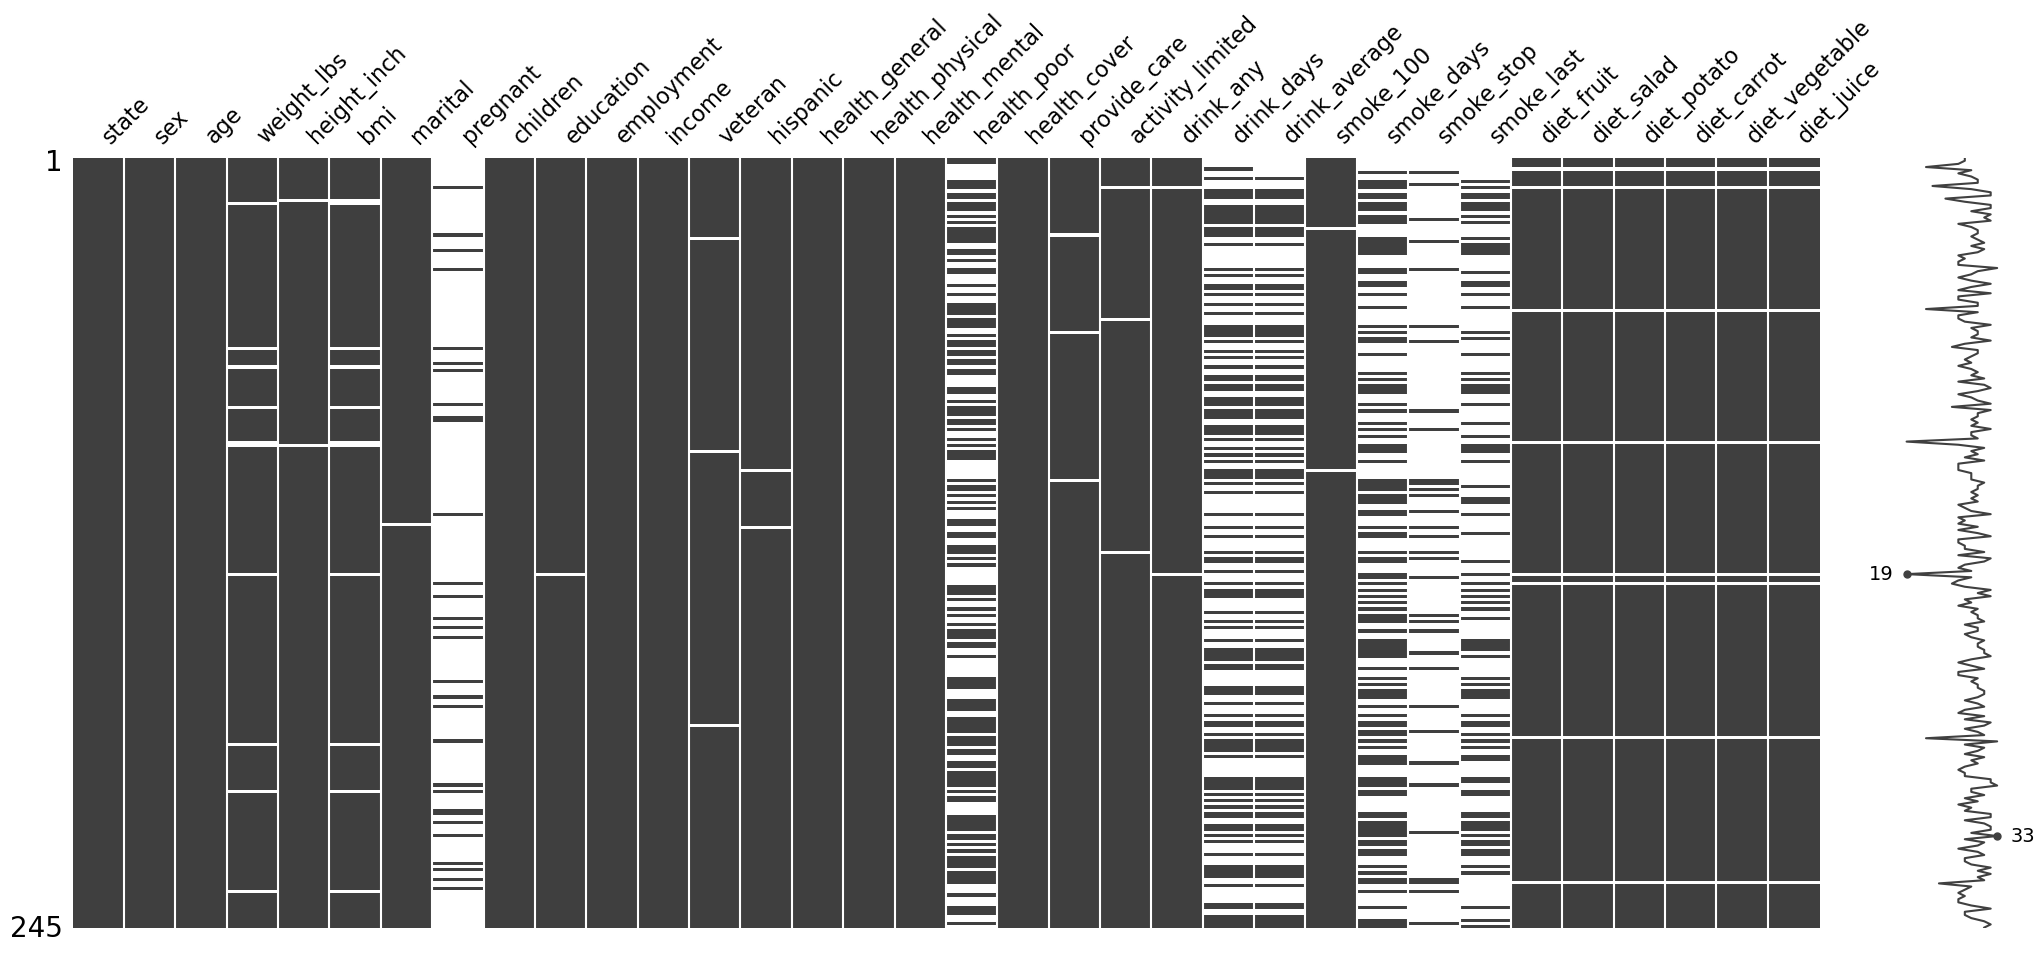

In [18]:
missingno.matrix(df=riskfactors_df)

Descripción del gráfico:
- Eje $x$ superior: Nombres de las variables.
- Barras: Representan cada variable
  - Color gris: Los datos completos
  - Color blanco: Los datos faltantes.
- Eje $y$ izquierdo: Total de rows/casos
- Eje $y$ derecho: Frecuencia de los datos faltantes.

Mediante el gráfico `matrix` se observa como se van cortanto las barras de datos completos por ausencia de datos.

📌 Como un dato curioso, las últimas 6 barras son iguales, se rompen en el mismo lugar, podemos empezar a deducir que existe un patrón entre esas variables.

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

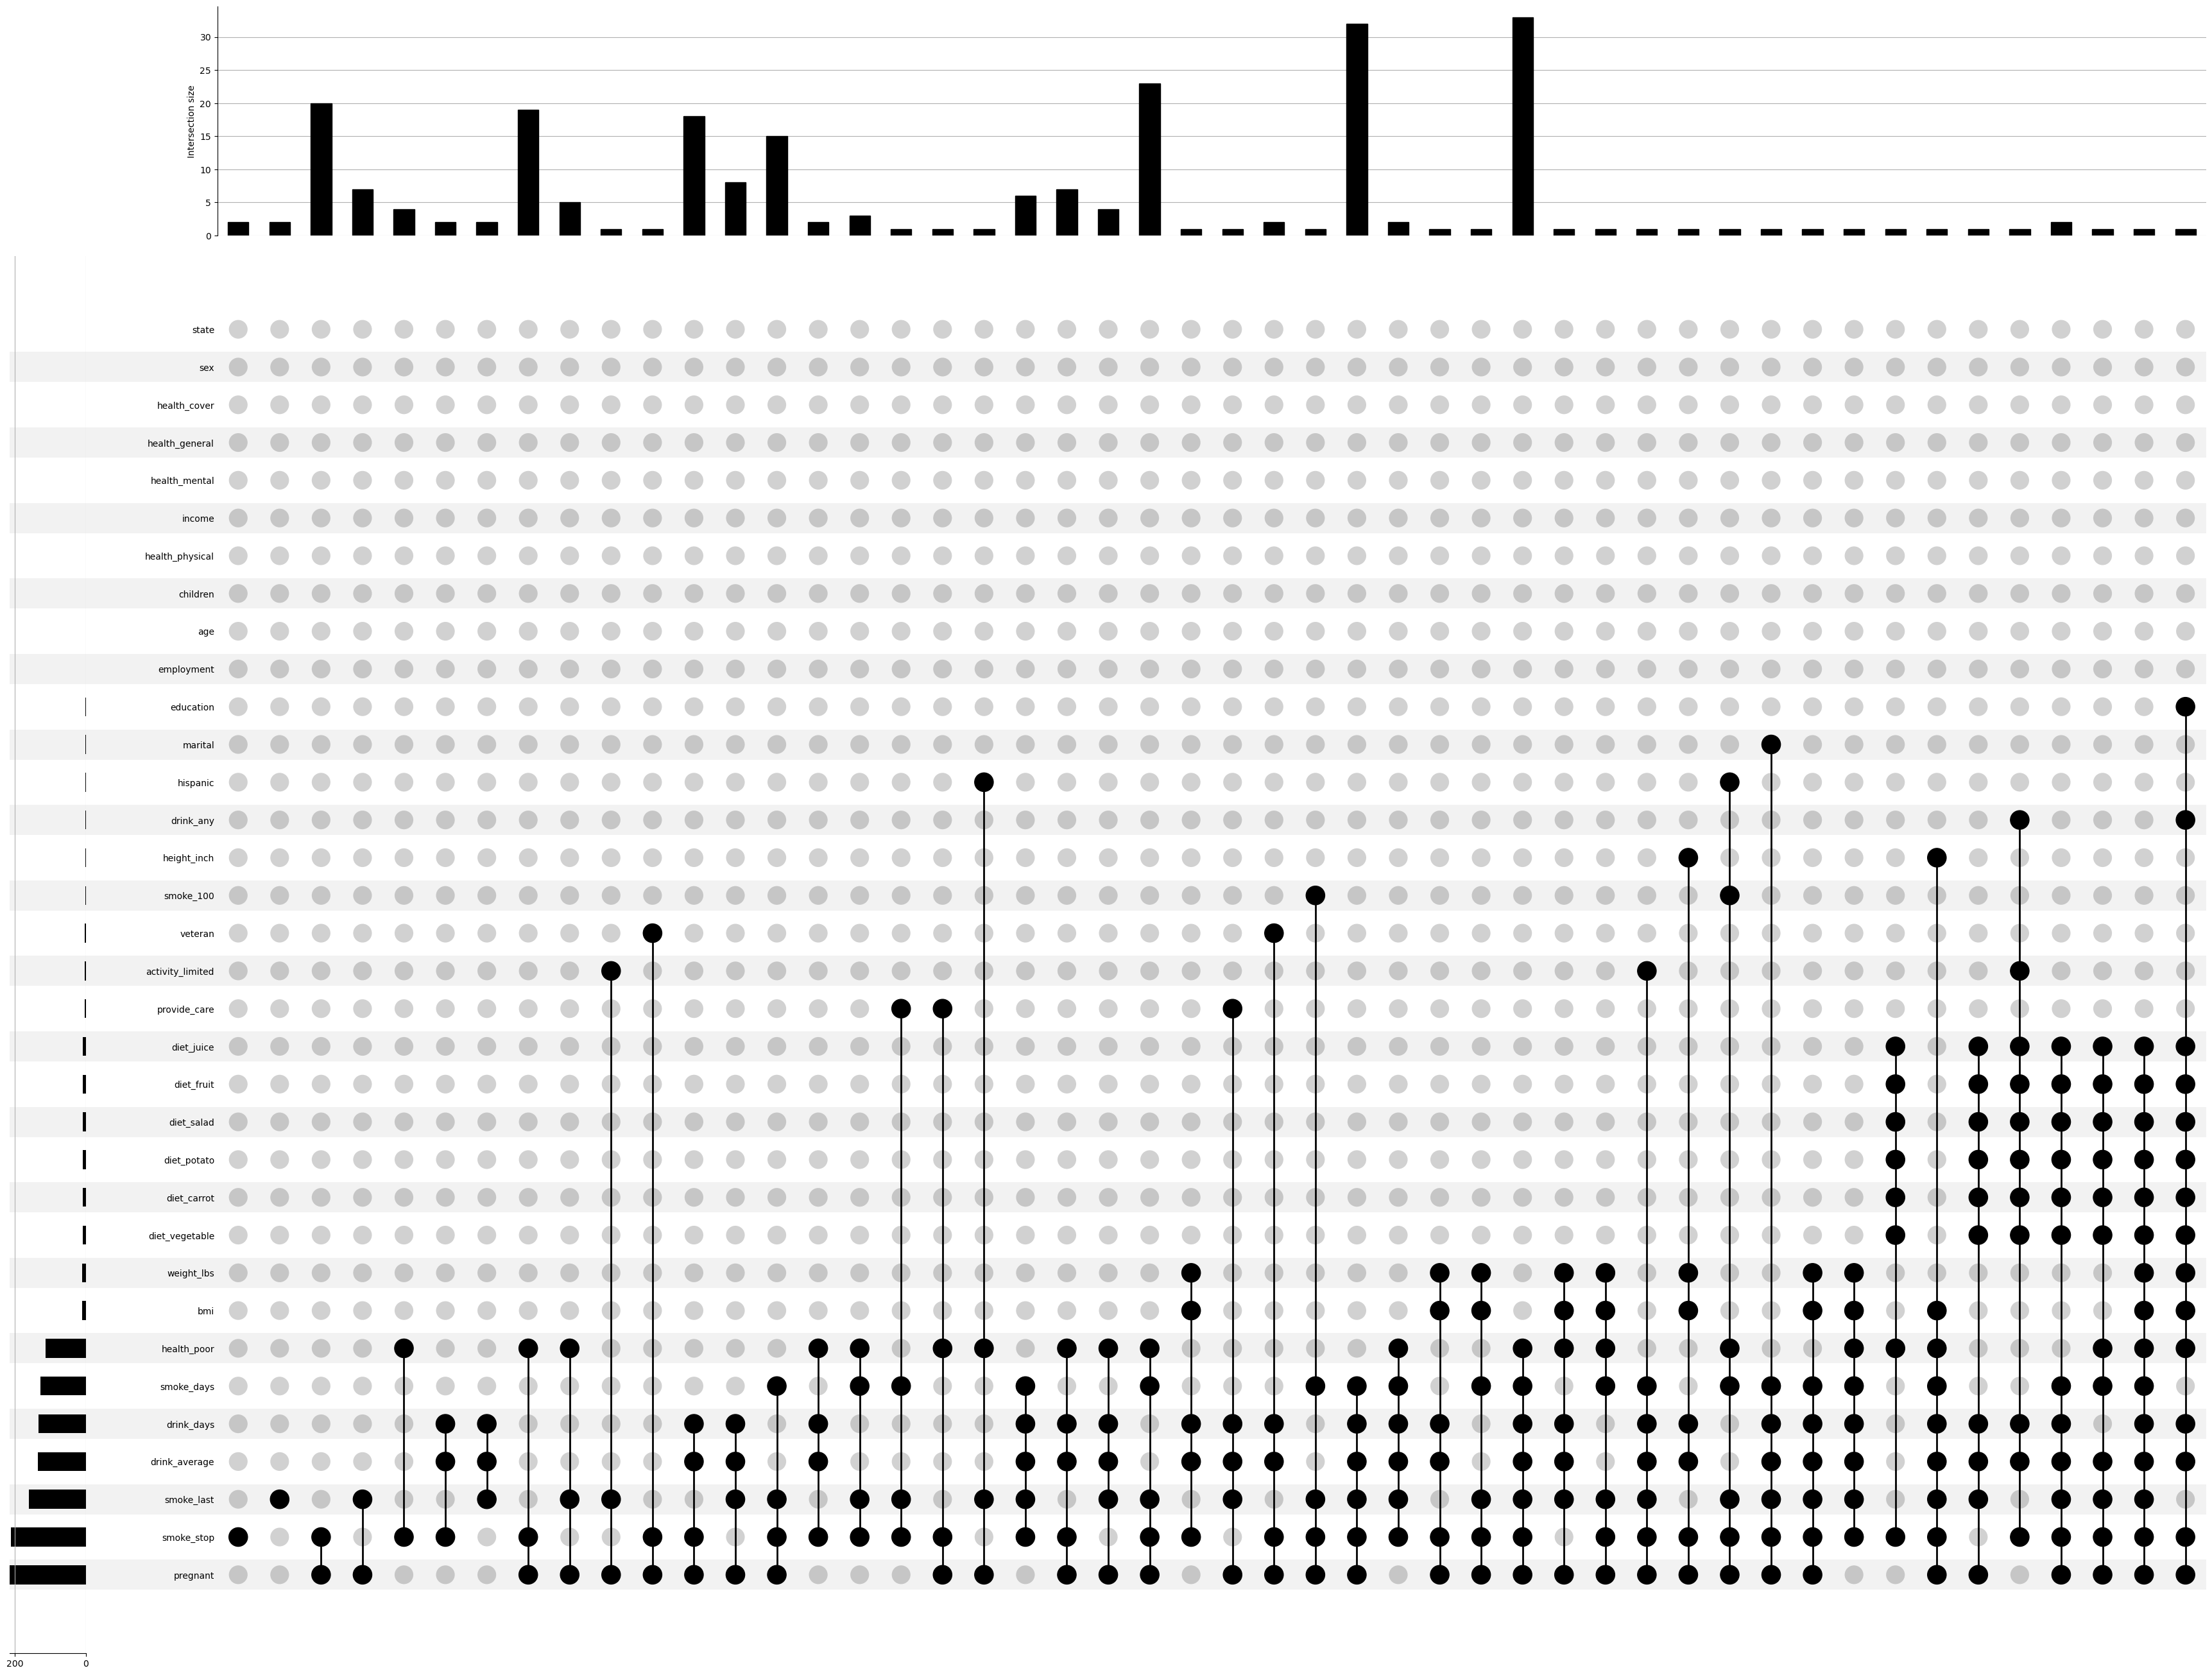

In [19]:
(
  riskfactors_df
  .missing
  .missing_upsetplot(
    variables=None, #["diet_fruit",	"diet_salad",	"diet_potato",	"diet_carrot",	"diet_vegetable",	"diet_juice"],
    element_size=60
  )
)

📢Bonus: El gráfico `upsetplot` muestra las intersecciones de datos faltantes entre las variables.

## Manipulación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
      Los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con ellos será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

**Cadenas de texto:**

In [20]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

**Números**:

In [21]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

#### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [22]:
# DF ejemplo para "detectar valores faltantes"
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [23]:
missing_data_example_df.missing.number_missing()

0

El DataFrame `missing_data_example_df` tiene muchos valores faltantes, sin embargo estan ocultos como valores tipo `string` y pandas no lo detecta; por ende se debe proceder hacer un a check manual para asegurar que no hay datos faltantes; en caso contrario reasignarles un valor (`np.nan`, `None` o `pd.NA`) que la herramienta pueda identificar.

**Revisión por tipo de dato**

Identificar el tipo de dato de las variables y revisar si coincide con el contenido. <br>
Por ejemplo, `[1, 3, "NA", -99, -98, -99]` es un númerico, pero tiene un valor string en la posición 2, en ese momento pandas infiere que todo el array es de tipo `object`

In [24]:
# Revisión de tipos
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

In [25]:
# Check al dataframe para corroborar que las columnas x & y son realmente object
missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


Pandas identifica columnas `x` y `y` como `object`, para el caso de `x` todos sus elementos son numéricos, sin embargo hay un string `"NA"` que rompe la integridad de la columna con otro dato que no corresponde.

En el caso de la columna `y` todos sus elementos son strings, sin embargo encontramos dos valores inusuales `N/A` y `NA` que son utilizados como un identificador de ausencia de valor, pero en un formato que pandas no puede identificar como tal.

**Revisión por valores únicos de los datos**

Otra forma de encontrar valores faltantes es hacer un check en los valores únicos, de esta forma podemos vislumbrar la aparición de elementos faltantes representados de formas que la herramienta no puede reconocer.

In [26]:
# Valores únicos por variable
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

En el DF de `missing_data_example_df` tenemos pocos datos, pero si tuvieramos un DF con cientos  de datos podría,ps identificar aquellos valores que no corresponden a la variable que estemos revisando.

In [27]:
# Valores únicos en todas las columnas del DF
(
  missing_data_example_df
  .select_dtypes(object)
  .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

#### Sustituyendo valores comúnmente asociados a valores faltantes

In [28]:
# script para exportar missing_data_example_df a csv
dest_path = path.data_raw_dir("missing_exaple.csv")
missing_data_example_df.\
  to_csv(dest_path, columns=["x", "y", "z"], index=False)

**Desde la lectura de datos**

La función `read_csv` nos permite sustituir los valores faltantes desde el inicio al cargar los datos en un DataFrame. 

**Consideraciones previas:**
- Conocer la estructura de los datos 
- Valores faltantes indentificados

In [29]:
pd.read_csv(
  dest_path,
  na_filter=True,
  na_values=[-1, -99]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


**Sustitución global**

La forma más habitual de sustiruir los valores faltantes. <br>
Hacer la sustitución una vez tengamos cargados los datos nos da las siguientes ventajas:
- Nos permite iterar sobre los datos a medida que vamos encontrando valores faltantes.
- Conocemos mejor el conjunto de datos sobre el que estemos trabajando.

In [30]:
(
  missing_data_example_df
  .replace(
    to_replace=[-99, "NA", "N/A"],
    value=np.nan
  )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


**Sustitución dirigida**

Aplica reglas de sustitución para una columna en especifico.

In [31]:
(
  missing_data_example_df
  .replace(
    to_replace={
      "z": { -1: np.nan }
    }
  )
)

,x,y,z
0,1,A,-100.0
1,3,N/A,-99.0
2,NA,NA,-98.0
3,-99,E,-101.0
4,-98,F,NaN
5,-99,G,NaN


### Valores faltantes implícitos

> "**Implícito** se refiere a todo aquello que se entiende que está incluido pero sin ser expresado de forma directa o explícitamente."
<br>

Un **valor faltante implícito** indica que el valor faltante **debería estar incluido**
en el conjunto de datos del análisis, **sin que éste lo diga** o lo **especifique**.
Por lo general, son valores que podemos encontrar al pivotar nuestros datos
o contabilizar el número de apariciones de combinaciones de las variables de estudio.

In [32]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


**¿Existen datos faltantes en le DF?** <br>
A simple vista conjunto de datos solo tiene un valor faltante. Pero si le prestamos atención al tiempo en que se tomó la medición (`time`), vemos que para `lynn` existen tres tiempos: `morning`, `afternoon` y `night`, mientras que para zelda solo tiene una medición (`morning`), es posible deducir que en este dataset faltan 2 observaciones para `zelda`. 


Sin embargo no todos los conjuntos de datos con los que estemos trabajando nos permitira hacer un análisis con solo ver el DF y pensar un poco, pues podemos encontrarlos con dataset de miles de registros, haciendo esta tarea más complicada.

#### Estrategias para la identificación de valores faltantes implícitos

**Pivotar la tabla de datos**

Supuestos para pivotar la tabla:
- Hay almenos dos columnas que estan relacionadas.
- El valor a identificar como faltante este en entre esas columnas.

In [33]:
(
  implicit_to_explicit_df
  .pivot(
    index="name", # Columna por la cual se va a povotear la tabla. (Nuevo index)
    columns="time", # Los valores únicos de esta columna se convertiran en las nuevas columnas
    values="value" # Valor que va a rellenar la intersección de nuevo index con las nuevas columnas.
  )
)

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


Con aplicar un `pivot` ahora se observa con mayor facilidad que noy solo un dato faltante, sino tres, los otros dos corresponden a la ausencia de la medición `morning` y `night` para `zelda`.

**Cuantificar ocurrencias en n-tuplas**

`n-tuplas`: Co-ocurrencia de distintos valores, ej. ¿cuantas veces aparece $x$ valor en comparación con otro?.

In [34]:
(
  implicit_to_explicit_df
  .value_counts(
    subset=["name"] # Columnas a cuantificar
  )
  .reset_index(name="n") # Asigna nombre a la columna que contiene el contador
  .query("n < 3") # Filtro
)

,name,n
1,zelda,1


#### Exponer filas faltantes implícitas a explícitas

Para realizar este proceso utilizaremos la librería `pyjanitor`, es una implementación del `janitnor` en `R`, provee una API poderosa para la limpieza y manejo de datos faltantes.


📌 **Nota:** La libreria `pyjanitor` se importa como `janitor`.

⚠️ La siguiente celda instala por medio de `pip` la versión `0.22.0` de la libreria `pyjanitor`, lo hice de esa manera por que las versiones posteriores arrojaban un error con una de las librerías que utiliza para el tipado estatico.

In [35]:
# Posterior a la versión 22 no es posible importar janitor, por un error en una de las librerias que utiliza pyjanitor
%pip install pyjanitor==0.22.0

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Importamos la libreria
import janitor

**Exponer n-tuplas de valores faltantes**

Encontrar los pares faltantes de las variables. <br>
A la función  `complete()` le enviamos como parámetro el nombre de las variables que conforman los pares de valores a completar en el DataFrame y en el resto de las variables colocara un valor faltante explícito; por default `np.nan`.

In [37]:
(
  implicit_to_explicit_df
  .complete(
    "name",
    "time"
  )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


**Limitar la exposición de n-tuplas de valores faltantes**

En muchas ocasiones no será necesario rellenar el DF con todos los pares faltantes, para hacerlo, tenemos que limitar ese relleno.

Utilizando la función `complete()` en lugar de enviar como párametro los nombres en texto de los pares de valores, le mandamos un diccionario por cada variable y le especificamos que valores son los que va a considerar.

In [38]:
(
  implicit_to_explicit_df
  .complete(
    { "name": ["lynn", "zelda"] },
    { "time": ["morning", "night"] }, # Se omite afternoon
    sort=True
  )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,night,NaN


### Tipos de valores faltantes

Mecanismos sobre lo cuales se podrían estar generando los valores faltantes. <br>
Existen 3 diferentes:
- _Missing Completely at Random_ **(MCAR)**: La localización de los datos faltantes en el dataset ocurre completamente al azar, no dependen de ningún otro dato.
- _Missing at Random_ (**MAR**): La localización de los valores faltantes en el dataset depende de otros valores observados.
- _Missing Not at Random_ (**MNAR**): La localización de los valores faltantes en el dataset dependen de los valores faltantes en sí mismos.    
    ⚠️ Estos son los más complicados de encontrar.

📌 **NO** hay seguridad sobre que mecanismo de valores faltantes es correcto para el dataset que este trabajando.

📢 _Conociendo el tema y a **través del análisis** podemos hacer **suposiciones** razonables_

In [39]:
data_path= path.data_raw_dir("pima-indians-diabetes.csv")
diabetes_df = pd.read_csv(data_path)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Revisión rápida de valores faltantes en el dataset `diabetes_df`

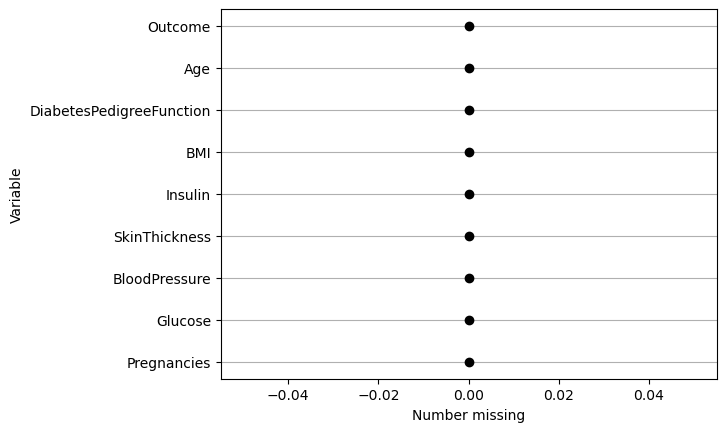

In [40]:
diabetes_df.missing.missing_variable_plot()

Aparentemente el DataFrame no tiene datos faltantes, sin embargo estan "enmascarados" (o bien codificados) con el valor $0$; se encuentran en a partir de la columna 1 (Glucose) hasta la columna 6 (DiabetesPedigreeFunction).

La conclusión sobre el valor $0$ en esas columnas esta dado por el contexto de los datos.<br>
Ejemplo: 
- Cuando el valor de la glucosa es de $0$ para un paciente de 21 años con una presión arterial de $74$ y un BMI de $27.7$, con esas mediciones es imposible que el paciente tenga una glucosa de $0$, se concluye que este valor representa un faltante (esa medición no se tomó).

Lo mismo ocurre con las otras mediciones con valor $0$.

In [41]:
diabetes_df[diabetes_df["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Sustituimos los $0$ por `np.nan` a partir de la columna 1 hsta la 6:

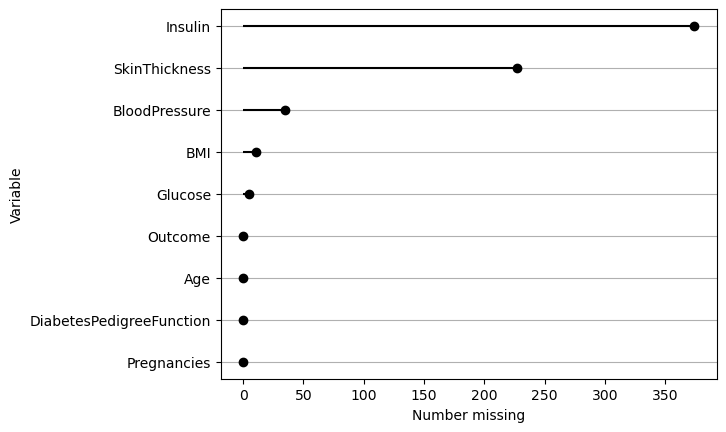

In [42]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan )

# Visualizamos
diabetes_df.missing.missing_variable_plot()

Una vez reemplazados por valores faltantes de tipo `np.nan` podemos visualizarlos en su totalidad, de esta forma observamos como las medicioens de insuluna y el grosor de la piel son las variables con más valores faltantes en el DataFrame.

#### Missing Completely at Random (MCAR)

<AxesSubplot:>

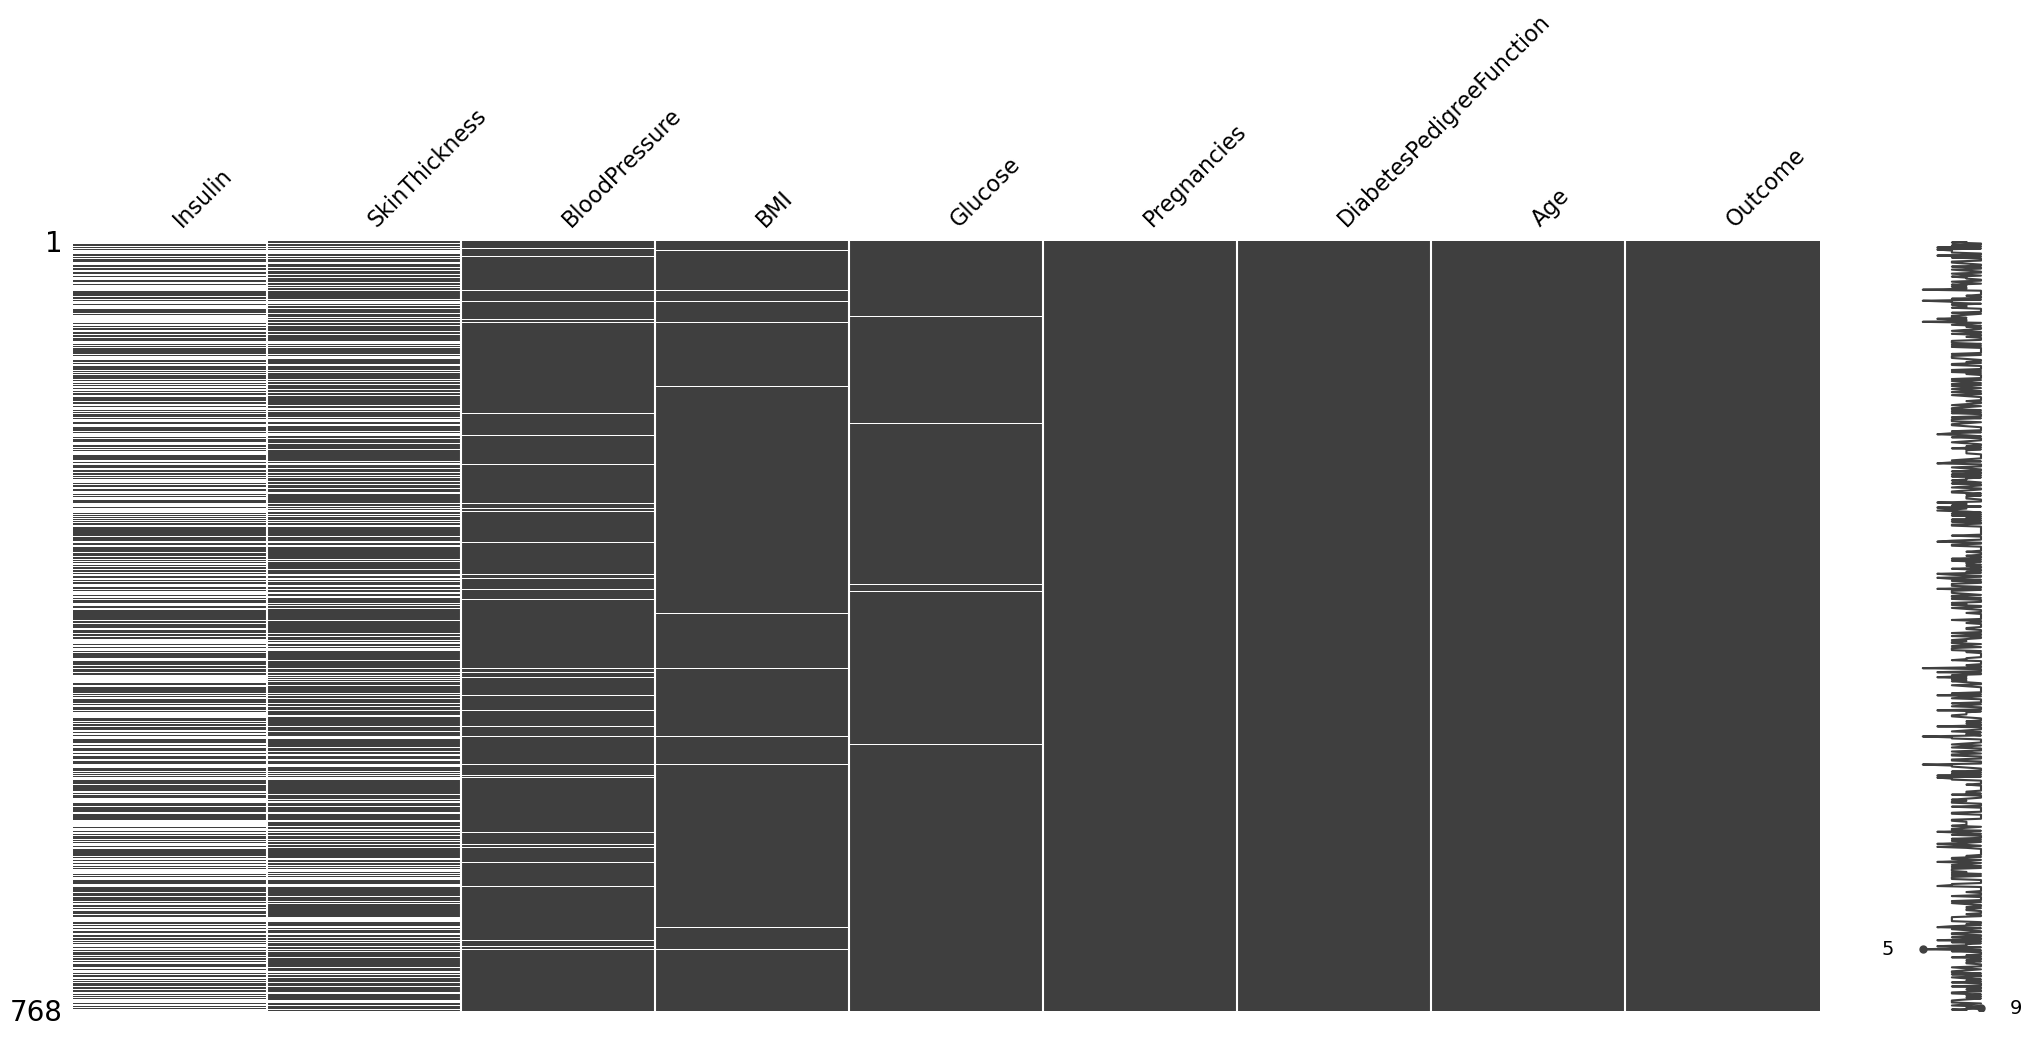

In [43]:
(
  diabetes_df
  .missing.sort_variables_by_missingness()
  .pipe(missingno.matrix)
)

**Suposición**: <br>
Las variables `Glucose` y `BMI` poseen pocos valores faltantes en comparación con las otras variables. Podemos decir que de valores faltantes en ellas es tan poco frecuente que es posible considerar su ausencia al azar.

#### Missing at Random (MAR)

<AxesSubplot:>

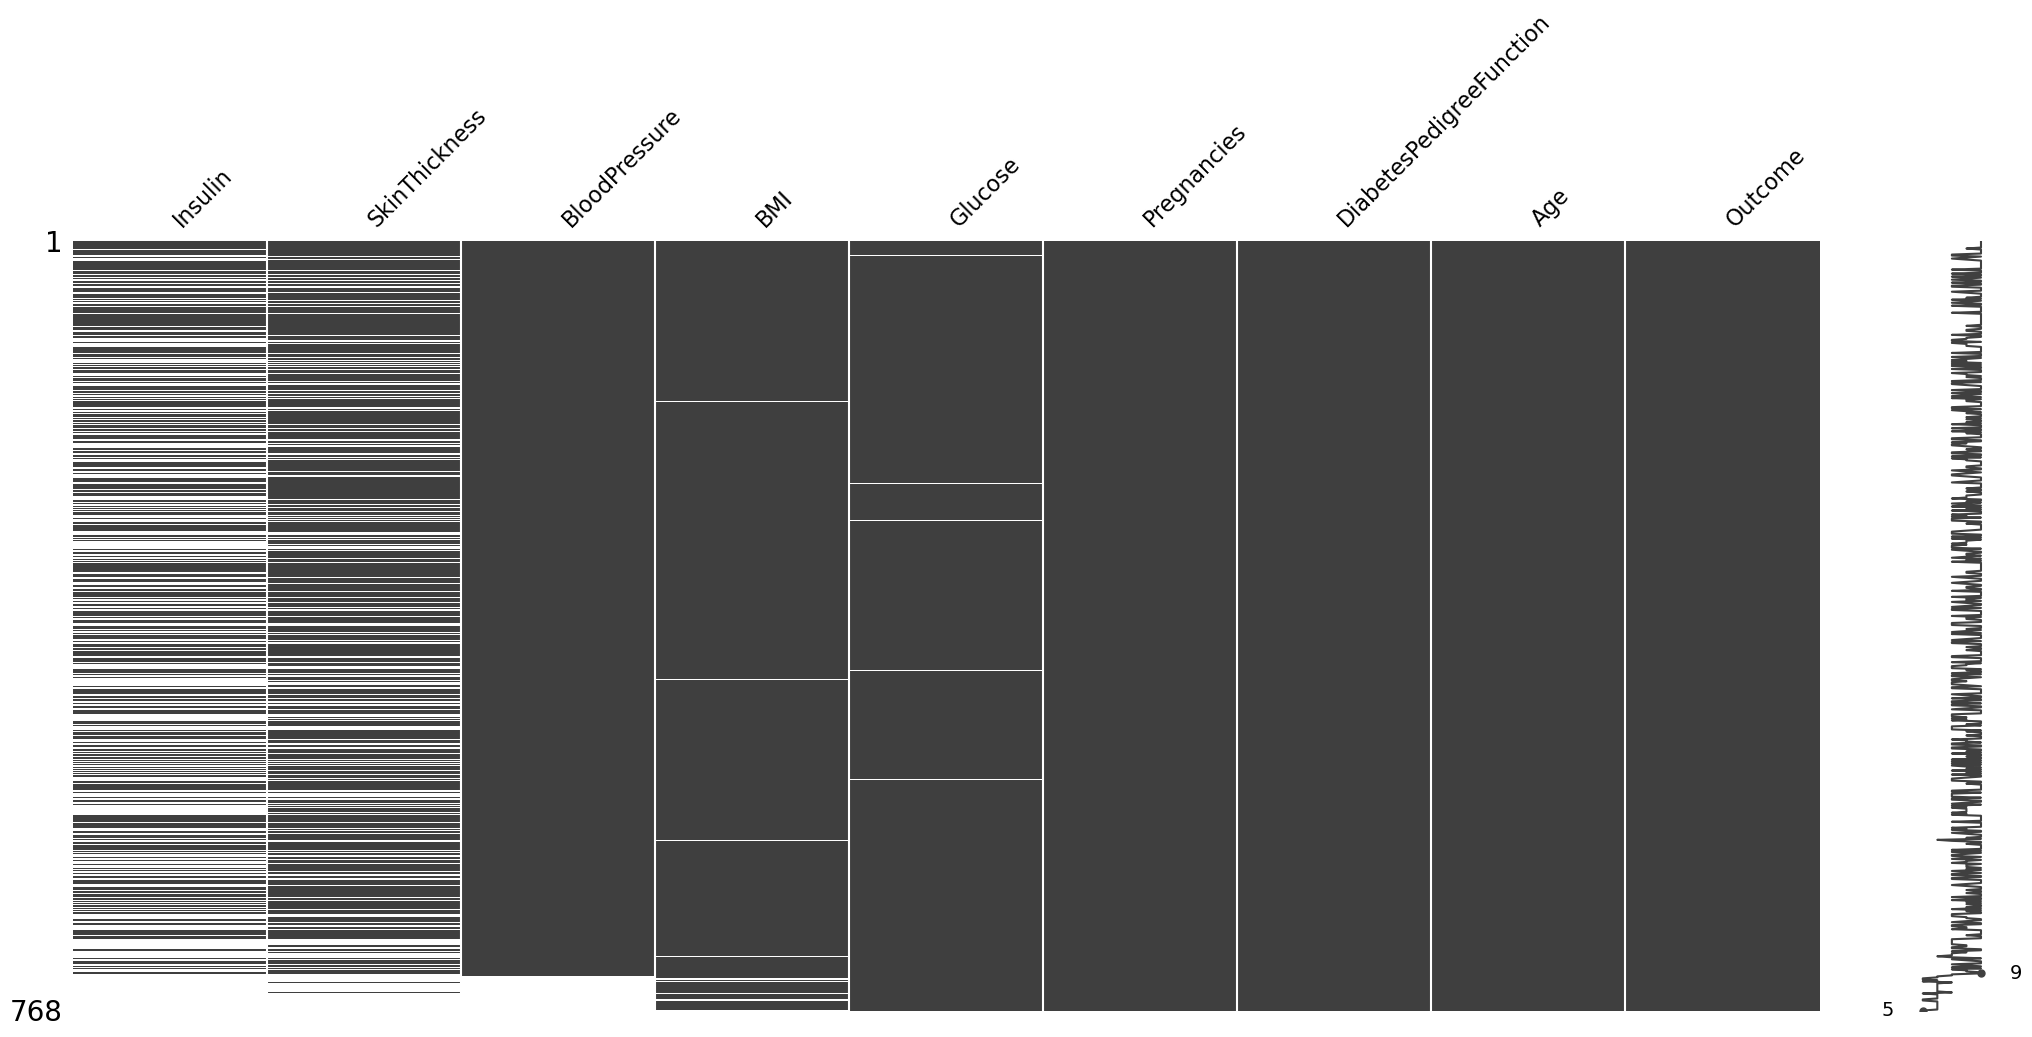

In [44]:
(
  diabetes_df
  .missing.sort_variables_by_missingness()
  .sort_values(by="BloodPressure")
  .pipe(missingno.matrix)
)

**Suposición**: <br>
Al ordenar la variable `BloodPressure`, los valores faltantes se acumulan en la parte inferior del gráfico, este movimiento también provocó el movimiento de los valores faltantes de la variable `BMI`, posiblemente la ausencia de valores en `BloodPressure` pueda estar asociada a la de otra variable.

#### Missing Not at Random (MNAR)

<AxesSubplot:>

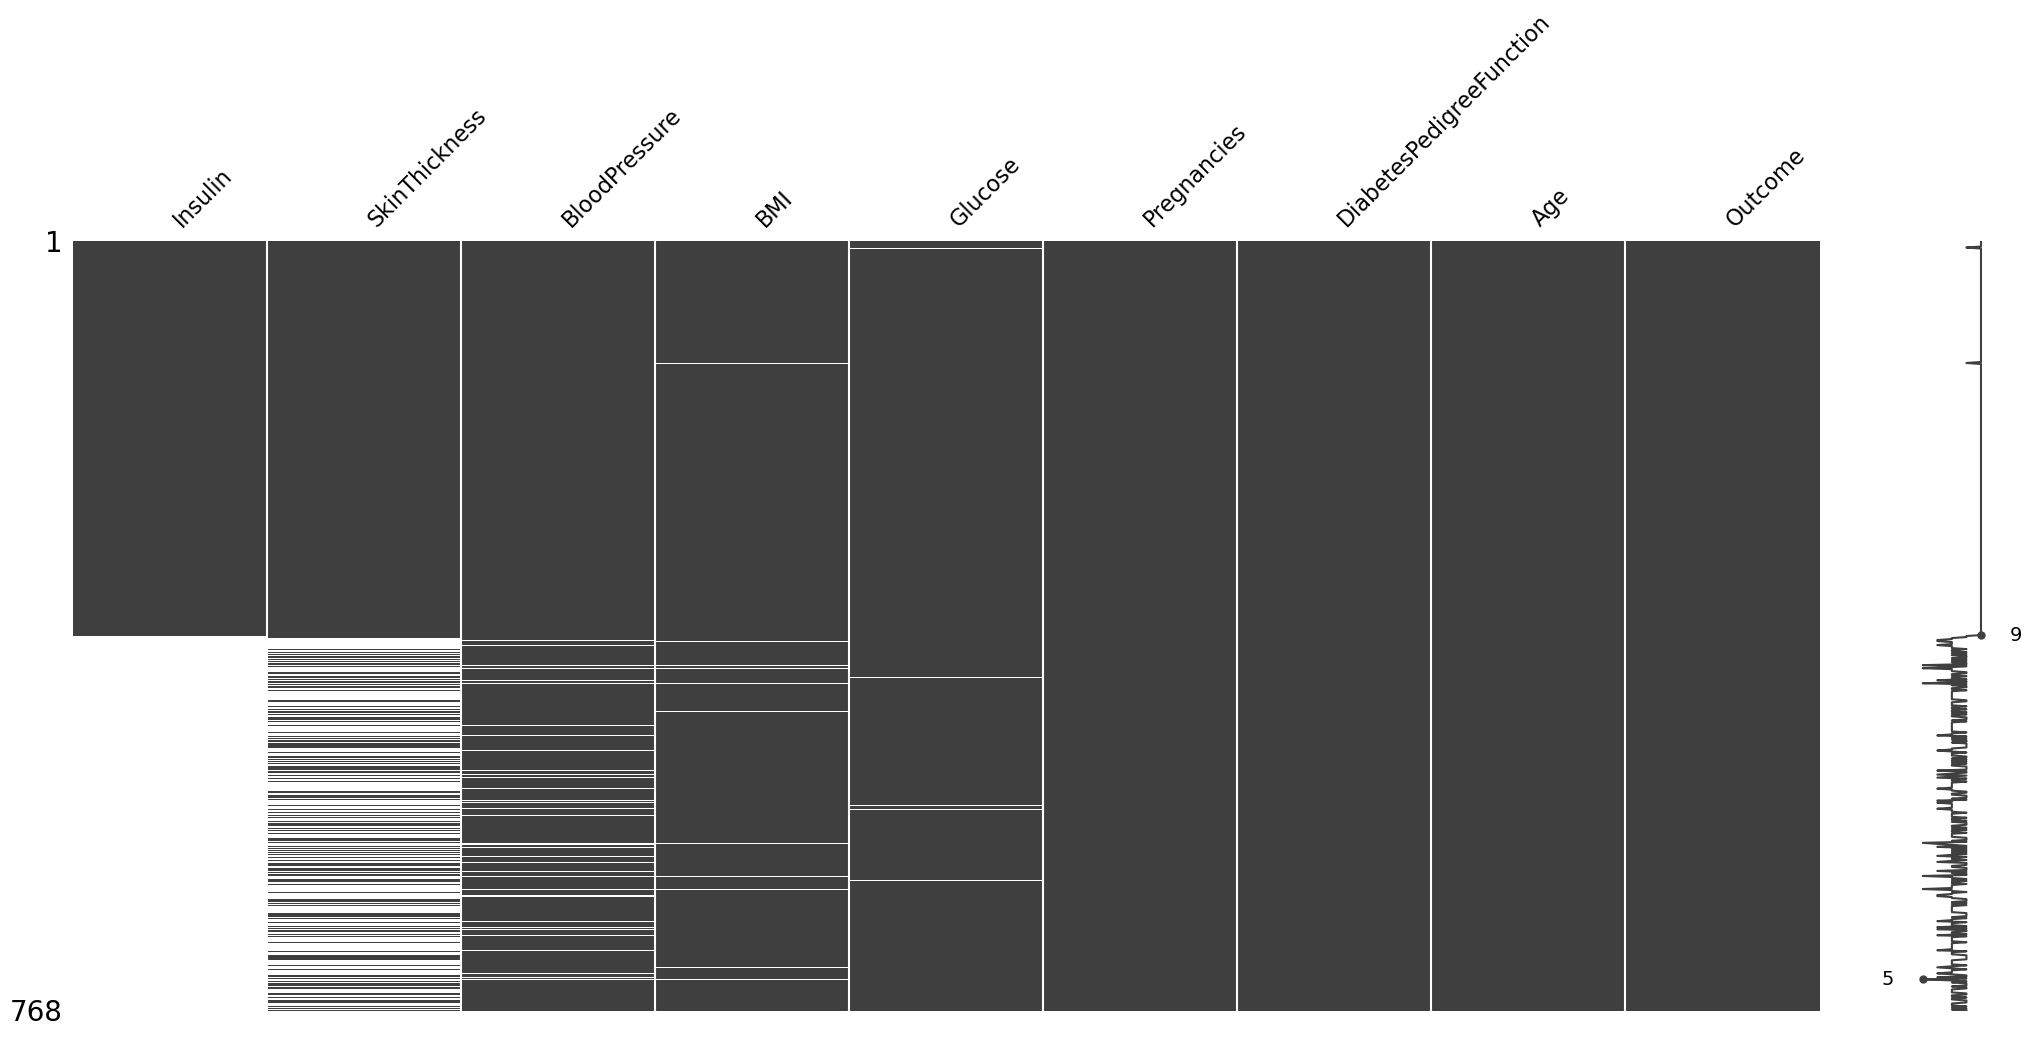

In [45]:
(
  diabetes_df
  .missing.sort_variables_by_missingness()
  .sort_values(by="Insulin")
  .pipe(missingno.matrix)
)

**Suposición**: <br>
Cuando ordenamos la variable `Insulin` variable `SkinThickness` se acumula al rededor de la ausencia de los valores faltantes de Insulin, la aparición no es continua, aparecen faltantes  seguidos de completos, esto nos podría llevar a la conslusión de un caso de MNAR al no aparecer los datos de la medición de insulina de forma tan abrupta. Es que podría no haberse tomado esa medición por una especificación medica, o bien por un comportamiento ajendo al estudio.

## Relaciónes de valores faltantes

### Matriz de sombras

La matriz de sombras (_Shadow Matrix_) es una tabla (matriz) con la misma dimensión de los datos originales, consiste en indicadores binarios de la falta de valores, donde:
- `True` indica falta de valor
- `False` indica la presencia de valor

Pasos para crear una matriz de sombras:
1. Identificar todos los valores faltantes (`np.nan`, `None` o `pd.NA`).
2. Reemplazar todos los valores faltantes con `True` y el resto con `False`.
3. Reemplazar valores `True` y `False` por valores más informativos:
    - `NA`: Faltantes (`True`)    
    - `!NA`: Resto (`False`)
4. Agregar sufijo a los nombres de las variables (columnas), comunmente se utiliza `_NA`.
5. Fusionar la matriz original (DataFrame) con la matriz de sombras.

📌 Al resultado de fusionar ambas matrices se le llama Matriz `NABULAR` (`NA`: Valores faltantes, `BULAR`: Tabular).

**Construcción de una matriz de sombras a mano**:

In [46]:
(
  riskfactors_df
  .isna() # Reemplazo de valores faltantes con valores booleanos
  .replace({ # Reemplazo de booleanos por valores más explicativos
    False: "Not missing", # !NA
    True: "Missing" # NA
  })
  .add_suffix("_NA") # Agregar sufijo
  .pipe( 
    # Matriz NABULAR
    lambda df: pd.concat(
      [riskfactors_df, df],
      axis="columns"
    )
  ) 
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


**Construcción de un matriz de sombras con `bind_shadow_matrix()`**:

In [47]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


**Exploración de estadísticos utilizando la matriz de sombras**:

Estadísticos de los datos faltantes de la variable `weight_lbs_NA` respecto a la variable `age`:

In [48]:
stats_from_sm = (
  riskfactors_df
  .missing.bind_shadow_matrix(only_missing=True)
  .groupby(["weight_lbs_NA"])
  ["age"]
  .describe()
  .reset_index()
)

sm_mean = stats_from_sm.loc[0, "mean"]
print(f"El promedio de edad de los pacientes sin registro de peso es {sm_mean.round(2)}")
stats_from_sm

El promedio de edad de los pacientes sin registro de peso es 60.1


,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Estadísticos de los datos faltantes de la variable `pregnant_NA` respecto a la variable `sex`:

In [49]:
(
  riskfactors_df
  .missing.bind_shadow_matrix(only_missing=True)
  .groupby(["pregnant_NA"])
  ["sex"]
  .describe()
  .reset_index()
)


,pregnant_NA,count,unique,top,freq
0,Missing,215,2,Female,123
1,Not Missing,30,1,Female,30


Al obtener los estadisticos de una variable numérica respecto a una categoríca (en este caso `sex`), los estadisticos que obtenemos son conteos y frecuencias.

Al interpresar estos estadisticos en los valores faltantes ("Missing") vemos que hay una diferencia de 92 elementos entre el total (count) de faltantes vs la frecuencia de apreción de _Female_ en la variable `sex`.

Entonces podemos inferir que esos 92 elementos restantes pertenecen a observaciones realizados a los varones (_Male_).

Estadísticos de los datos faltantes de la variable `pregnant_NA` (en mujeres) respecto a la variable `age`:

In [50]:
filter = riskfactors_df["sex"] == "Female"
stats_from_sm = (
  riskfactors_df[filter]
  .missing.bind_shadow_matrix(only_missing=True)
  .groupby(["pregnant_NA"])
  ["age"]
  .describe()
  .reset_index()
)

sm_mean =stats_from_sm.loc[0, "mean"]
print(f"El promedio de edad de pacientes mujeres sin registro de embarazo es de {sm_mean.round(2)}")
stats_from_sm 

El promedio de edad de pacientes mujeres sin registro de embarazo es de 65.46


,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,123.0,65.463415,12.428347,45.0,56.0,62.0,77.0,97.0
1,Not Missing,30.0,33.133333,9.212934,7.0,29.5,34.0,40.0,44.0


Al aplicar los estadísticos solo a los registros de mujeres observamos que:
- La media de edad de las mujeres sin registro de embarazo es te 65 años
- El rango de edad de los valores faltantes en mujeres va desde los 45 a los 97
- LA media de edad de las muejeres con registro de embarazo (ya sea si esta o no embarazada) es del 33 años 
- El rango de edad de de mujeres con observaciones va desde los 7 hasta los 44 años.

En este caso podemos inferir que los valores faltantes estan relacionados a la edad de las muejeres, pues la ventana reproductiva de estas esta límitada por su edad.

#### Visualización de valores faltantes en una variable

- Se construyen a partir de una matriz `NABULAR`
- Permite detectar la sesgos en la presencia o ausencia de valores faltantes ocasionados por otra variable.

**Visualización `boxenplot`**: <br>
Por medio del diagrama de caja condicional podemos visualizar como la variable `age` (en mujeres) varia dependiendo si el valor de `pregnant_NA` esta presente o no.

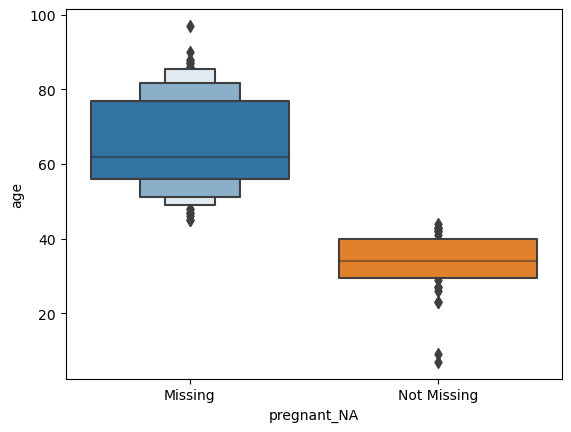

In [51]:
filter = riskfactors_df["sex"] == "Female"
(
  riskfactors_df[filter]
  .missing.bind_shadow_matrix(only_missing=True)
  .pipe(
    lambda df: (
      sns.boxenplot(
        data=df,
        x="pregnant_NA",
        y="age"
      )
    )
  )
)
plt.show()

**Visualización `displot - kernel density estimation`**: <br>
Nos permite visualizar la distribuciuón de la variable `age` condicionada a la ausencia o presencia de valores faltantes (`pregnant_NA`).

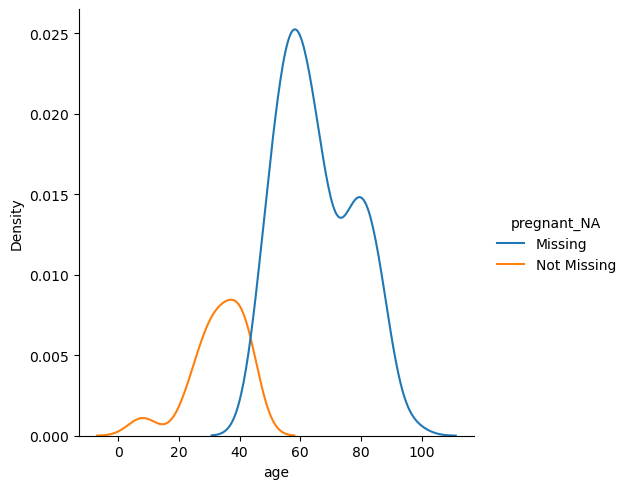

In [52]:
filter = riskfactors_df["sex"] == "Female"
(
  riskfactors_df[filter]
  .missing.bind_shadow_matrix(only_missing=True)
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        x="age",
        hue="pregnant_NA",
        kind="kde"
      )
    )
  )
)
plt.show()

**Visualización `displot`**: <br>
Nos muestra dos gráficos
1. Distribución de la edad cuando hay ausencia de valores en `pregnant_NA`.
2. Distribución de la edad cuando no hay ausencia de valores en `pregnant_NA`.

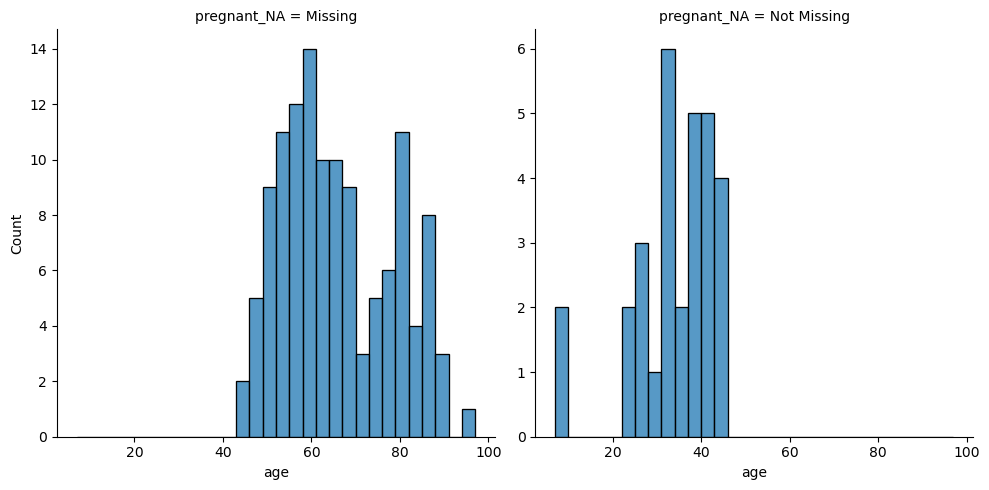

In [53]:
filter = riskfactors_df["sex"] == "Female"
(
  riskfactors_df[filter]
  .missing.bind_shadow_matrix(only_missing=True)
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        x="age",
        col="pregnant_NA",
        facet_kws={ "sharey": False },
        bins=30
      )
    )
  )
)
plt.show()

#### Visualización de valores faltantes en dos variables

Permite visualizar y comparar dos variables cuando ambas tienen valores faltantes. <br>
Su importancia radica en que podemos ver si estas variables tienen relación o alguna tendencia, así como una fácil observación de acumulación de estos valores.


Para poder gráficar los valores de una variable cuando la otra tiene valores faltantes es necesario generar valores dummies para la variable con valores faltantes.

In [54]:
def column_fill_with_dummies(
  column: pd.Series,
  proportion_below: float=0.1, # Porcentaje en el cual queramos graficar los datos sin meter ruido a los datos originales
  jitter: float=0.075, # Ayuda a visualizar los datos cuando haya solapamiento 
  seed: int=42 # Semilla para generar siempre los mismos datos aleatorios
) -> pd.Series:
  
  column = column.copy(deep=True)

  # Extraer metadatos
  missing_mask = column.isna()
  number_missing_values = missing_mask.sum() # Total de valores faltantes
  column_range = column.max() - column.min() # Grjficar debajo de los valores reales

  # Shift de los datos -> Asegurar que los datos esten por debajo de los originales con la proporción definida
  column_shift = column.min() - column.min() * proportion_below

  # Agregar ruido al rededor de los puntos
  np.random.seed(seed)
  column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

  # Guardamos solo donde encontramos valores faltantes
  column[missing_mask] = column_shift + column_jitter

  return column

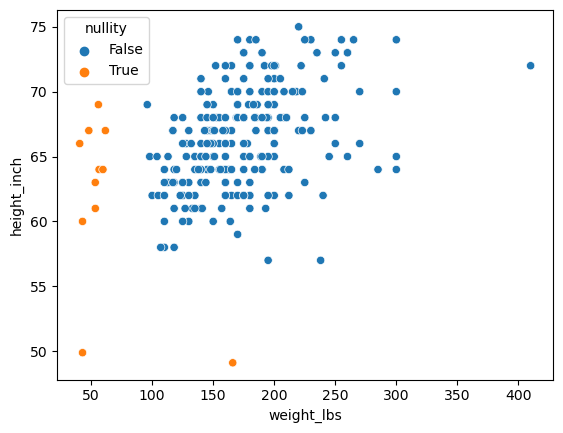

In [55]:
(
  riskfactors_df
  .select_dtypes( # 1. Seleccionamos solo las columbas numéricas
    exclude="category"
  )
  .pipe( # 2. Filtramos las columnas que tengan datos faltantes
    lambda df: df[df.columns[df.isna().any()]]
  ) # 3. Creamos la matriz de sombras
  .missing.bind_shadow_matrix(true_string=True, false_string=False)
  .apply( # 4. Rellenamos los faltnates con valores dummies
    lambda column: column if "_NA" in column.name else column_fill_with_dummies(column)
  )
  .assign( # 5. Creamos variable de segmentación 
    nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
  )
  .pipe( # 6. Graficamos
    lambda df: (
      sns.scatterplot(
        data=df,
        x="weight_lbs",
        y="height_inch",
        hue="nullity"
      )
    )
  )
)
plt.show()

**Aplicando la extensión personalizada sobre pandas**:

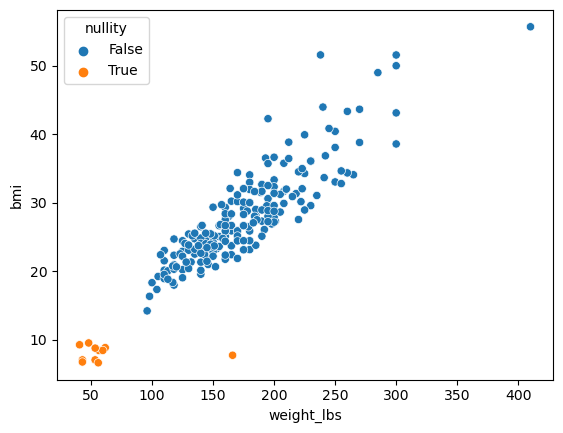

In [56]:
riskfactors_df.missing.missing_scatterplot(x="weight_lbs", y="bmi")

### Correlación de nulidad

La correlación de nulidad es una **medida estadística** para determinar si la ausencia de valores en una variable esta relacionada con la ausencia de valores en otra variable.

Es un Coeficiente de correlación como el de Pearson (Kendall  ó Spearman), sin embargo este se calcula sobre la ausencia o presencia de valores en las variables.

Responde a la pregunta: <br>
**¿Existen valores faltantes que aparecen conjuntamente con otras variables en el dataset?**

La podemos responder con 2 gráficos.

**heatmap**

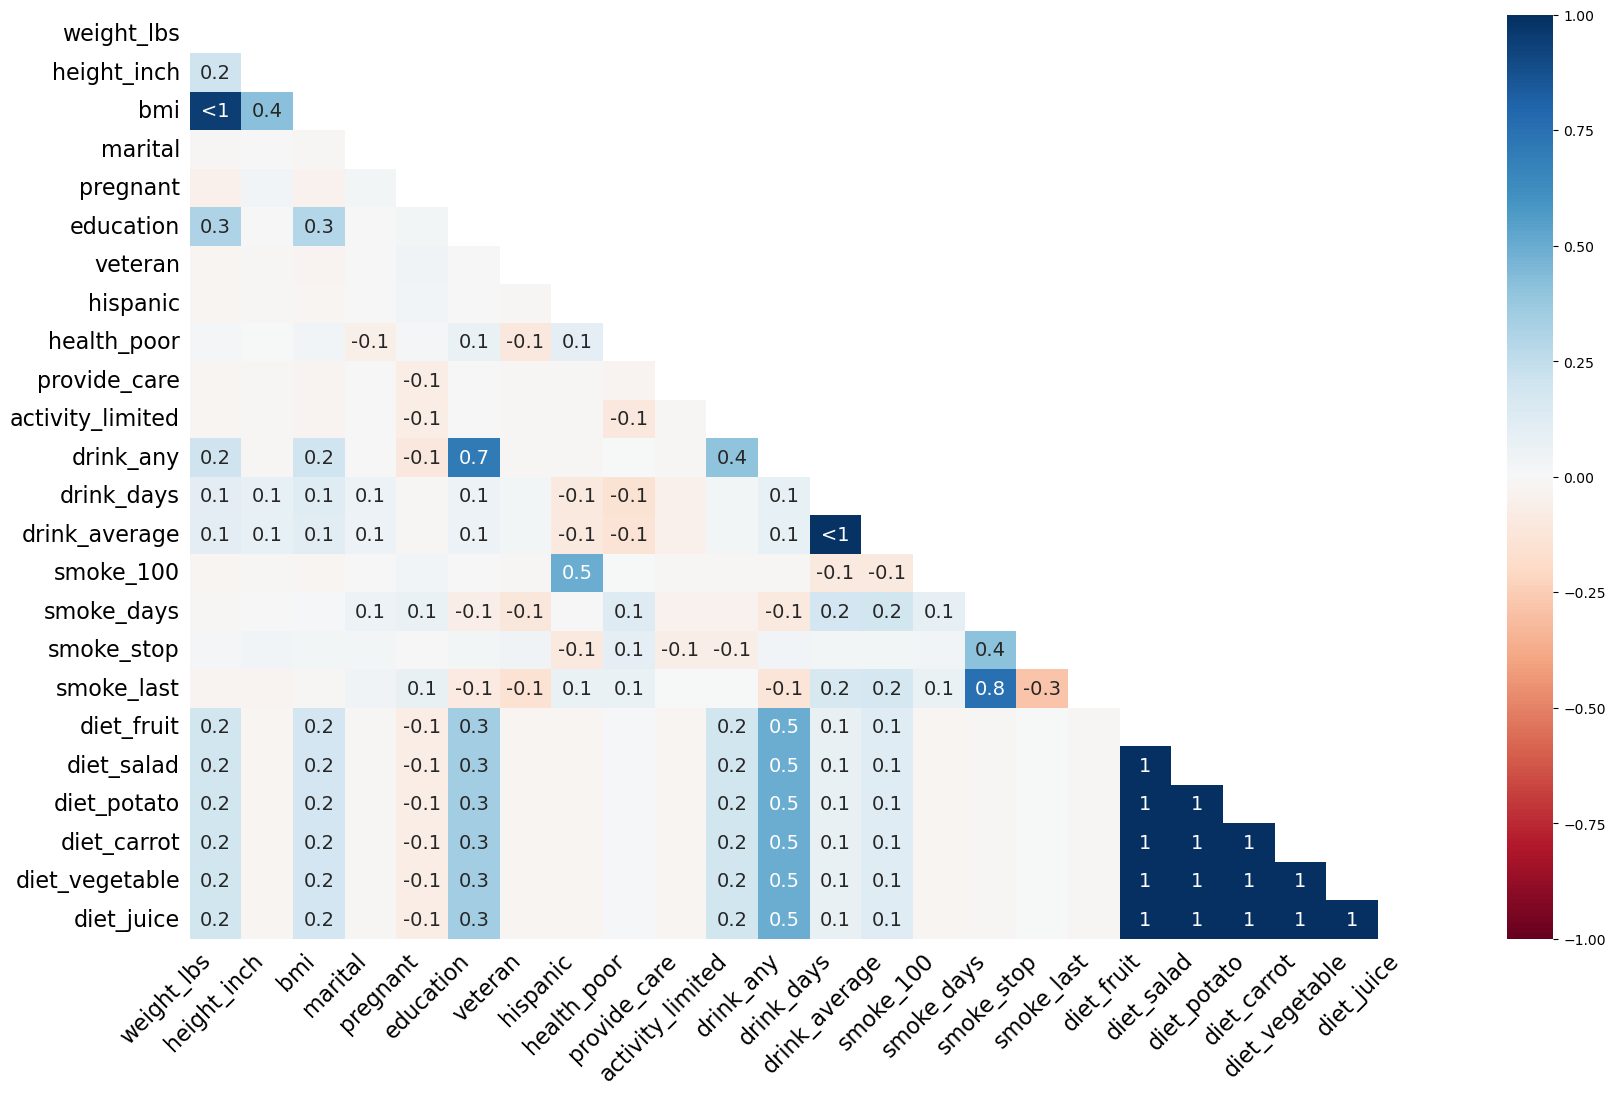

In [57]:
missingno.heatmap(df=riskfactors_df)
plt.show()

**Interpretación:** <br>
- Correlación positiva (azul): La **ausencia** de valores en una variable esta asociada a la ausencia de valores en la otra variable.
- Correlación negativa (rojo): La **presencia** de valores de una variable esa asociada con la ausencia de valores en la otra variable

**dendrogram**

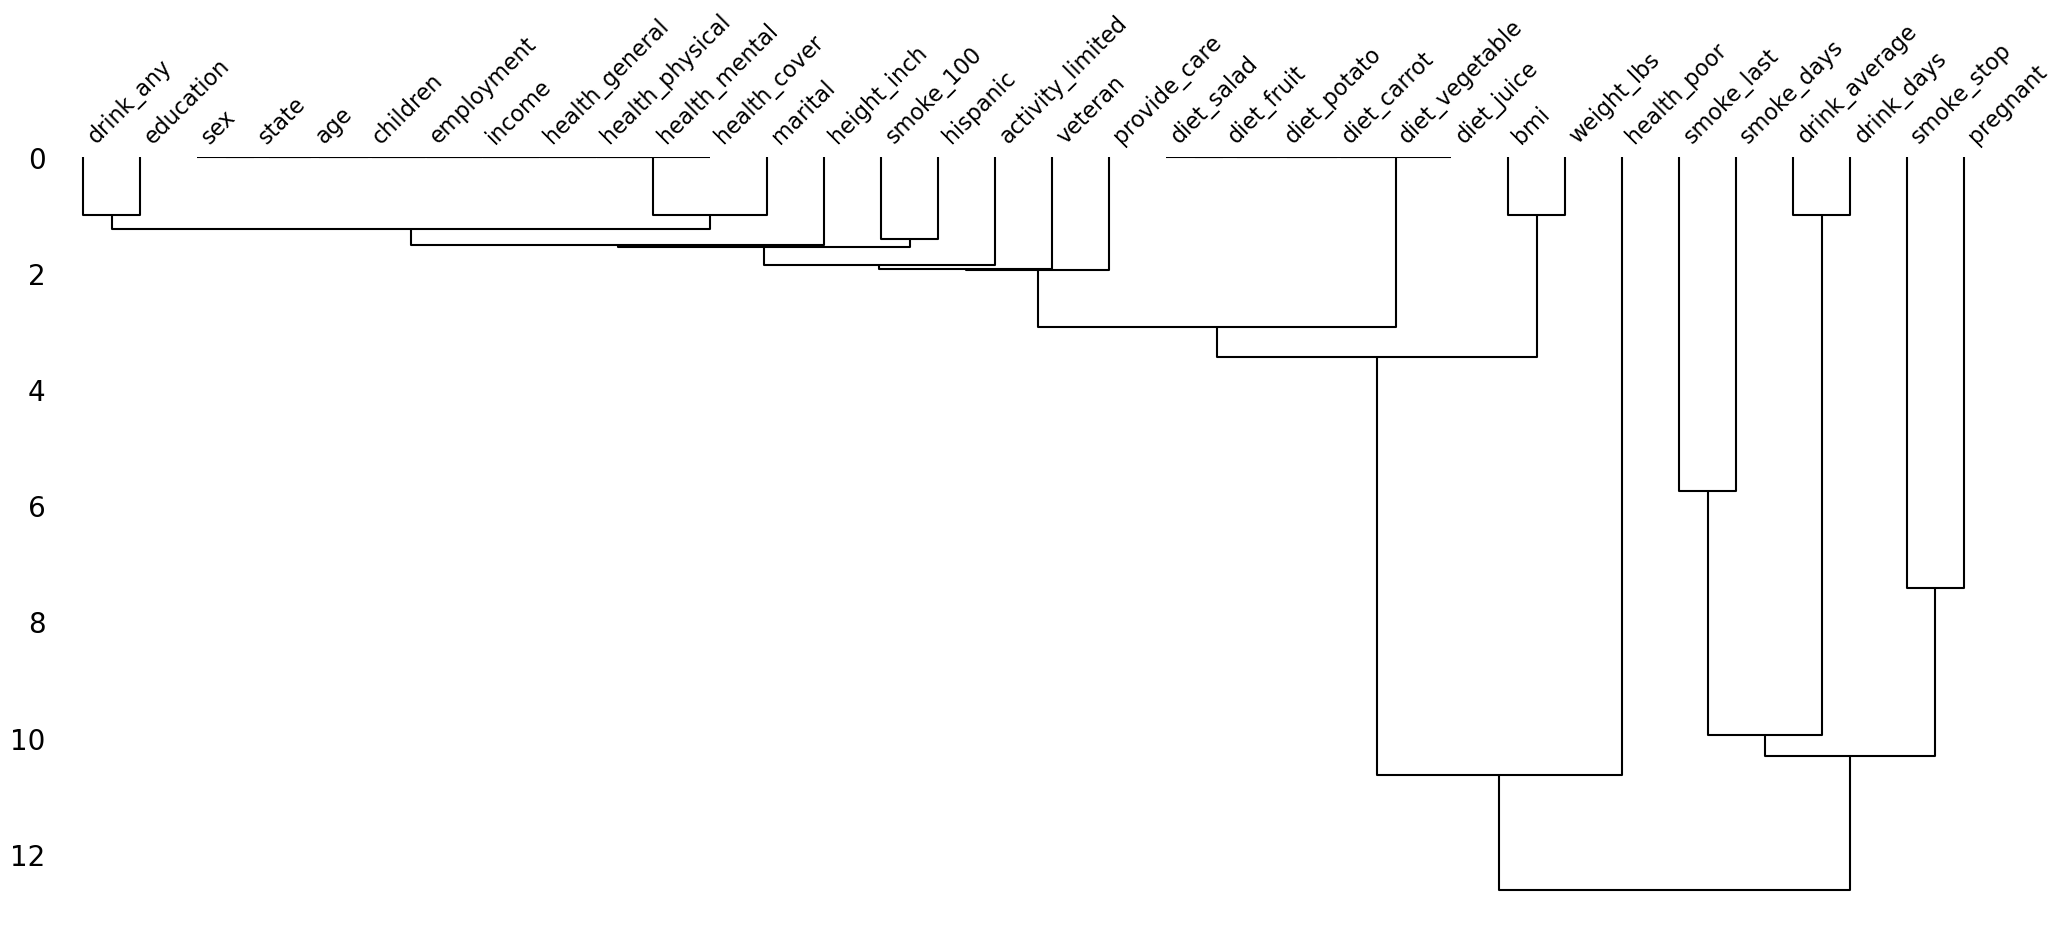

In [58]:
missingno.dendrogram(df=riskfactors_df)
plt.show()

**Interpretación**: <br>
- Mas cercanas estan las variables, es mas probable que esten correlacionadas.
- Mas alejadas esten las variables, es menos probable que esten correlacionadas.

## Tratamiento de valores faltantes

### Eliminación

La eliminación de valores faltantes **asume** que los valores faltantes están perdidos completamente al azar (`MCAR`). En cualquier otro caso, realizar una eliminación de valores faltantes podrá ocasionar **sesgos** en los análisis y modelos subsecuentes.

Cuantificamos cuantos elementos totales tenemos, de esta forma podemos ir viendo cuantos datos vamos perdiendo.

In [59]:
riskfactors_df.shape

(245, 34)

#### Pairwise deletion (eliminación por pares)

Solo se "eliminan" los valores faltantes durante los calculos de ciertas funciones. 
- Conteo
- Suma
- Estadísticos

📢Los datos siguen en el dataset pero la herramienta (en este coso `pandas`) los ignora.

In [60]:
riskfactors_df["weight_lbs"].size, riskfactors_df["weight_lbs"].count()

(245, 235)

In [61]:
mean_womv = riskfactors_df["weight_lbs"].mean()
mean_wmv  = riskfactors_df["weight_lbs"].mean(skipna=False)

print(f"Media ignorando los faltantes: {mean_womv}")
print(f"Media tomando en cuenta los faltantes: {mean_wmv}")

Media ignorando los faltantes: 174.26808510638298
Media tomando en cuenta los faltantes: nan


#### Listwise deletion (eliminación por lista)

Elimina la fila que contenga valores faltantes.

**Con base a 1 columna**:

In [62]:
(
  riskfactors_df
  .dropna(
    subset=["weight_lbs"], # Columna en la que se basa para eliminar las filas que contengan un faltante en esta variable
    how="any" # Algoritmo de eliminaicón
  )
  .shape
)

(235, 34)

**Con base a 2 columnas**:

In [63]:
(
  riskfactors_df
  .dropna(
    subset=["weight_lbs", "height_inch"], # Columna en la que se basa para eliminar las filas que contengan un faltante en esta variable
    how="any" # Algoritmo de eliminaicón
  )
  .shape
)

(234, 34)

Eliminar la fila unicamene cuando los valores de 2 columnas sean faltantes:

In [64]:
(
  riskfactors_df
  .dropna(
    subset=["weight_lbs", "height_inch"], # Columna en la que se basa para eliminar las filas que contengan un faltante en esta variable
    how="all" # Algoritmo de eliminaicón
  )
  .shape
)

(244, 34)

#### Representación gráfica tras la eliminación de valores faltantes

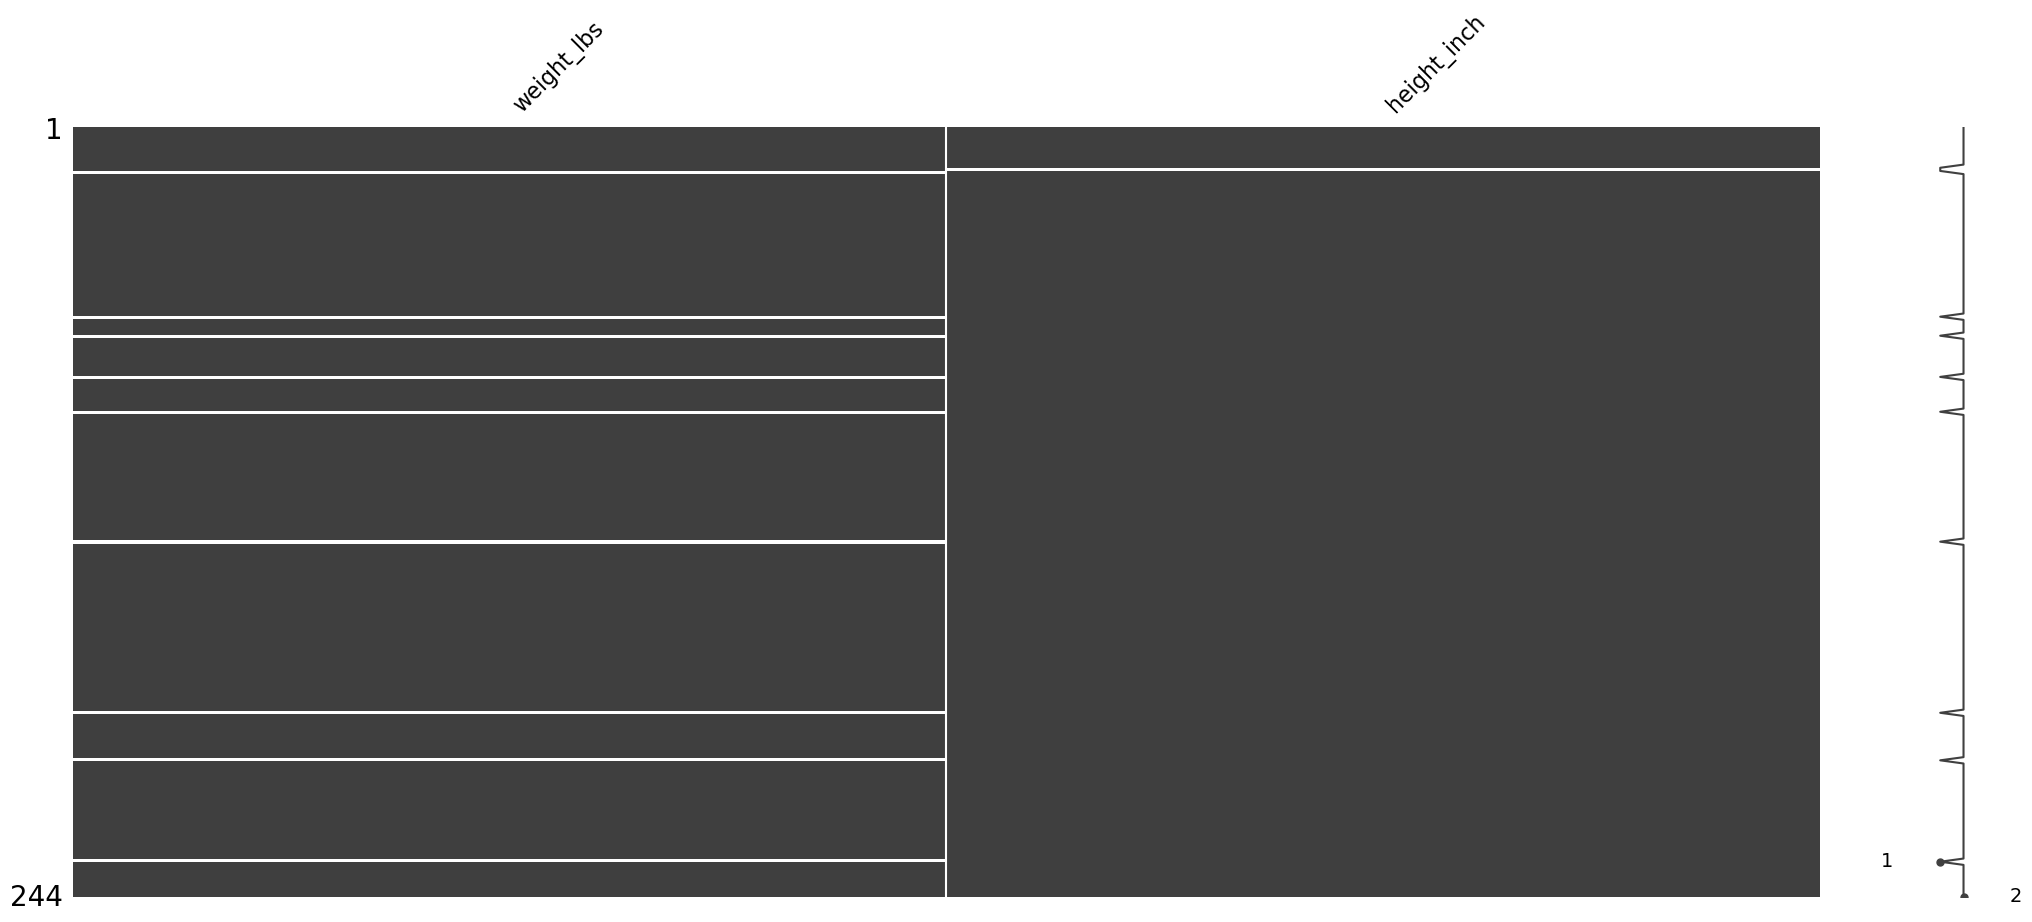

In [65]:
(
  riskfactors_df
  .dropna(
    subset=["weight_lbs", "height_inch"], # Columna en la que se basa para eliminar las filas que contengan un faltante en esta variable
    how="all" # Algoritmo de eliminaicón
  )
  .select_columns(["weight_lbs", "height_inch"])
  .pipe(missingno.matrix)
)

plt.show()

### Imputación

La imputación de datos es el proceso de reemblazar los valores faltantes por un valor valido, pueden ser:
- **Estadísticos**: Media, Moda, Mediana
- **Contexto**: Se conoce la estrucura de los datos.
- **Modelo de ML**: Predecir su valor.

**Por contexto**: <br>
En el DataFrame de ejemplo las variables `time` y `value` estan completas, sin embargo la variable `name` cuenta con valores faltantes.

Cada persona tiene dos observaciones de tiempo `morning` y `afternoon`, pero al momento de registrar la segunda observación el nombre se omitió, por lo tanto la imputación correspondera en rellenar la segunda observación de cada persona con el nombre que le precede.

In [66]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)
implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [67]:
# Forward fill
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


**Estadístico (único valor)**: <br>
Este tipo de imputación se aplica a variables numéricas. Para el ejemplo utilizando el DataFrame `riskfactors` colocaremos el valor de la media de las variables `weight_lbs`, `height_inch`, `bmi`.

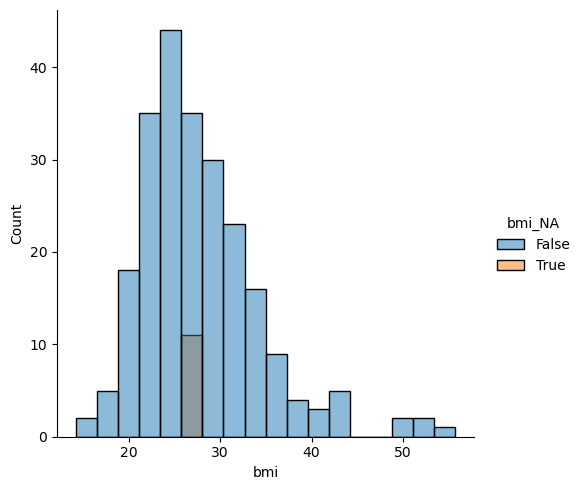

In [71]:
(
  riskfactors_df
  .select_columns("weight_lbs", "height_inch","bmi")
  .missing.bind_shadow_matrix(true_string=True, false_string=False)
  .apply( # Imputación
    axis = "rows",
    func = lambda col: col.fillna(col.mean()) if "_NA" not in col.name else col
  )
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        x="bmi",
        hue="bmi_NA"
      )
    )
  )
)

plt.show()

Sin embargo no sería correcto imputar a la variable `bmi` con la media, sino con su valor calculado con la ecuación:
$$
BMI = \frac {weight} {height^2} * 703
$$

📌 **NOTA**: La ecuación aplica si las medidas estan en libras y pulgadas


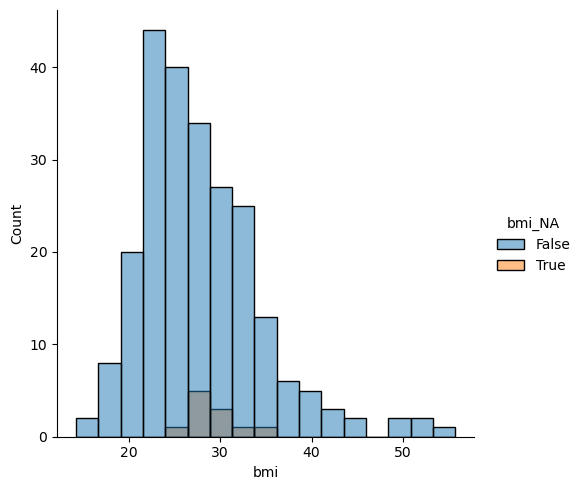

In [73]:
(
  riskfactors_df
  .select_columns("weight_lbs", "height_inch","bmi")
  .missing.bind_shadow_matrix(true_string=True, false_string=False)
  .assign( # Imputación "weight_lbs", "height_inch"
    weight_lbs = lambda df: df["weight_lbs"].fillna(df["weight_lbs"].mean()),
    height_inch = lambda df: df["height_inch"].fillna(df["height_inch"].mean()),
    bmi = lambda df: df.apply(
      lambda row: (row["weight_lbs"]/row["height_inch"]**2 * 703) if pd.isna(row["bmi"]) else row["bmi"],
      axis=1
    )
  )
  .pipe( 
    lambda df: (
      sns.displot(
        data=df,
        x="bmi",
        hue="bmi_NA"
      )
    )
  )
)

plt.show()

Si prestamos atención a los valores imputados, siguen la misma distribución que los valores reales.

**Relación de las variables imputadas**:

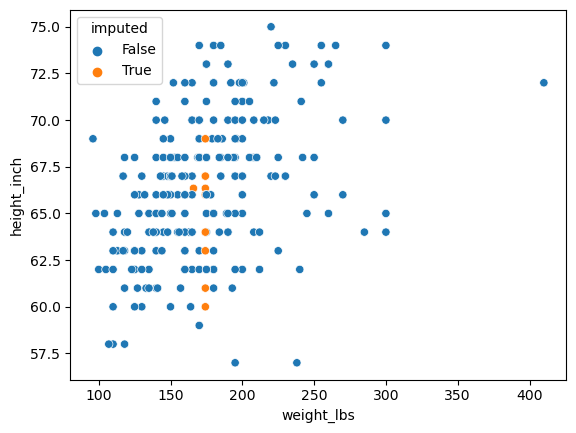

In [76]:
(
  riskfactors_df
  .select_columns("weight_lbs", "height_inch")
  .missing.bind_shadow_matrix(true_string=True, false_string=False)
  .apply( # Imputación
    axis = "rows",
    func = lambda col: col.fillna(col.mean()) if "_NA" not in col.name else col
  )
  .assign(
    imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
  )
  .pipe(
    lambda df: (
      sns.scatterplot(
        data=df,
        x="weight_lbs",
        y="height_inch",
        hue="imputed"
      )
    )
  )
)

plt.show()

#### Visualización de multiples variables imputadas

In [97]:
imputed_df = (
  riskfactors_df
  .select_columns("weight_lbs", "height_inch","bmi")
  .missing.bind_shadow_matrix(true_string=True, false_string=False)
  .assign( # Imputación "weight_lbs", "height_inch"
    weight_lbs = lambda df: df["weight_lbs"].fillna(df["weight_lbs"].mean()),
    height_inch = lambda df: df["height_inch"].fillna(df["height_inch"].mean()),
    bmi = lambda df: df.apply(
      lambda row: (row["weight_lbs"]/row["height_inch"]**2 * 703) if pd.isna(row["bmi"]) else row["bmi"],
      axis=1
    )
  )
)
imputed_df

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


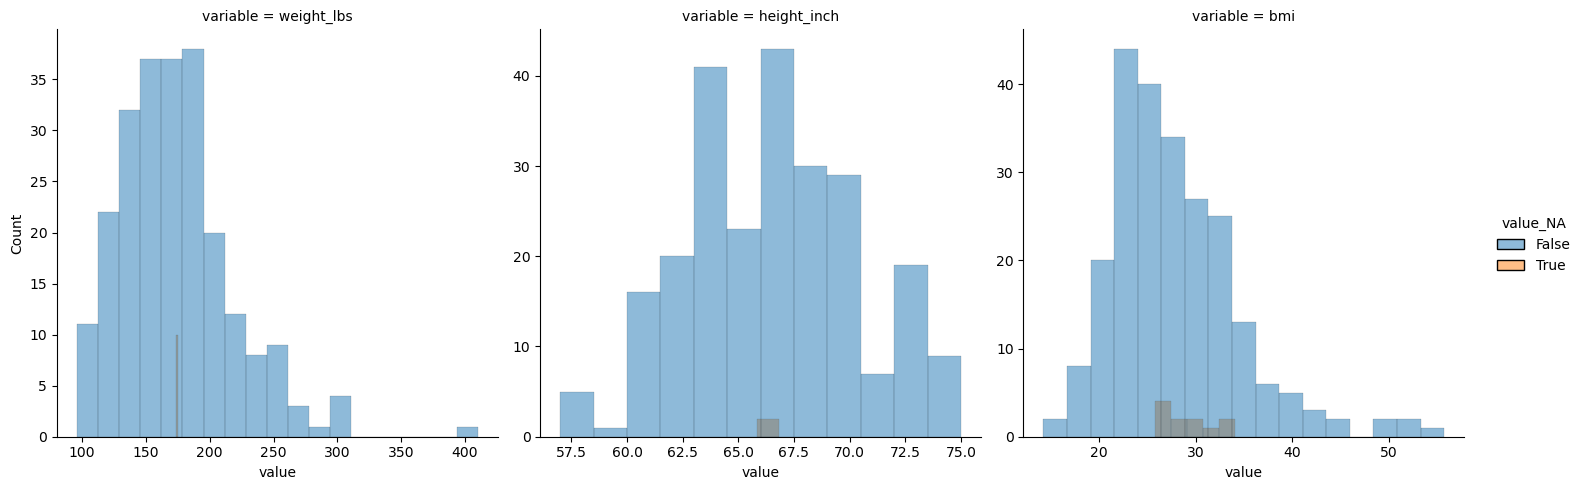

In [118]:
(
  imputed_df
  .pivot_longer(
    index="*_NA"
  )
  .pivot_longer(
    index=["variable", "value"],
    names_to="variable_NA",
    values_to="value_NA"
  )
  .assign(
    valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA )
  )
  .query("valid")
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        x="value",
        hue="value_NA",
        col="variable",
        facet_kws={
          "sharex": False,
          "sharey": False
        },
        common_bins=False
      )
    )
  )
)
plt.show()